In [1]:
import json
import os

with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']
print(data_path)

/scratch2/thdaryan/data/merged_result


In [2]:
import nltk
import numpy as np
import json
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score as meteor 

[nltk_data] Downloading package punkt to
[nltk_data]     /home/guest/fzhafran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
os.getcwd()

'/scratch2/fzhafran/rsa_referring_expression'

### Similarity from taufiq's fine tuned rsa

In [46]:
import math
nltk.download('wordnet')
from nltk.corpus import wordnet

similarity_scores_taufiq = []

for i in range(5000):
    print('~~{}~~'.format(i))
    print(i)
    similarity_scores_taufiq.append([])

    file_number = math.floor(i / 1000) * 1000
    expressions_1 = np.load('data/test/merged_pure/top3_exps_from_{}_to_{}.npy'.format(file_number, file_number+1000), allow_pickle=True)
    
    with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{i}.json')) as json_file:
        label = json.load(json_file)
    refs = [[r] for r in label['ref_sents']]
    print('refs')
    print(refs)
    
    id = i - file_number

    print('expression (first only)')
    if (len(expressions_1[id]) > 0):
        print(expressions_1[id][0])
    else:
        print('NO EXPRESSION GENERATED')
    # print(word_tokenize(expressions_1[50][1]))
    
    words_in_expression = []
    for expression in expressions_1[id]:
        words = expression.split()
        words_in_expression.append(words)

    
#     for expression in words_in_expression:
    if (len(words_in_expression) > 0):
        for index1, word1 in enumerate(words_in_expression[0]):
            for index2, word2 in enumerate(words_in_expression[0]):
                if (word1 != '' and word2 != '' and index1 < index2):
                    print(word1, word2)
                    wordnet1 = wordnet.synsets(word1)
                    wordnet2 = wordnet.synsets(word2)
                    if (wordnet1 and wordnet2):
                        similarity = wordnet1[0].wup_similarity(wordnet2[0])
                        print(similarity)
                        if (similarity != None):
                            similarity_scores_taufiq[i].append(similarity)
    else:
        print('NO EXPRESSION GENERATED')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/guest/fzhafran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


~~0~~
0
refs
[['guy petting elephant'], ['foremost person'], ['green shirt']]
expression (first only)
person
~~1~~
1
refs
[['cat'], ['Cat on right'], ['cat, but not in reflection']]
expression (first only)
the left cat
the left
the cat
left cat
0.2857142857142857
~~2~~
2
refs
[['girl in blue top'], ['girl in the middle'], ['girl in the middle in blue jacket']]
expression (first only)
woman
~~3~~
3
refs
[['black laptop'], ['kblack laptop'], ['black laptop']]
expression (first only)
small keyboard
small keyboard
0.2857142857142857
~~4~~
4
refs
[['front whit'], ['WHITE COW, FRONT MOST'], ['white cow next to the brown one']]
expression (first only)
the right sheep
the right
the sheep
right sheep
0.08
~~5~~
5
refs
[['man'], ['man on right'], ['man in background']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~6

0.16666666666666666
~~61~~
61
refs
[['Lady front'], ['woman in front red cap'], ['person in front']]
expression (first only)
the left person
the left
the person
left person
0.46153846153846156
~~62~~
62
refs
[['guy on left'], ['FAR LEFT']]
expression (first only)
near person person
near person
0.2
near person
0.2
person person
0.8571428571428571
~~63~~
63
refs
[['female skiier'], ['skier in black bodysuit'], ['girl on left facing front']]
expression (first only)
looking person
looking person
0.15384615384615385
~~64~~
64
refs
[['girl on right'], ['girl on right'], ['person on right']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~65~~
65
refs
[['guy with sprinkle donut'], ['(love this show) person on right']]
expression (first only)
the right person
the right
the person
right person
0.15384615384615385
~~6

refs
[['fat guy on right white shorts'], ['bald'], ['white shorts black shirt']]
expression (first only)
sitting person
sitting person
0.15384615384615385
~~128~~
128
refs
[['arm on bottom right'], ['right side arm'], ['arm in lower-right']]
expression (first only)
wooden arm
wooden arm
None
~~129~~
129
refs
[['CARPET ON RIGHT'], ['couch under the bear on right'], ['the foreground on the right..orange']]
expression (first only)
little floor
little floor
0.14285714285714285
~~130~~
130
refs
[['cow closest to the camera in the middle of the frame'], ['front center cattle']]
expression (first only)
near field cow
near field
0.15384615384615385
near cow
0.08695652173913043
field cow
0.23076923076923078
~~131~~
131
refs
[['green vehicle roof'], ['top of vehicle in foregroound'], ['green car']]
expression (first only)
the right car
the right
the car
right car
0.1
~~132~~
132
refs
[['left traffic light'], ['Green light'], ['stop light one left side']]
expression (first only)
gray the first fr

refs
[['Skateboarder in front'], ['Guy on right'], ['Man in front']]
expression (first only)
tall person
tall person
0.2
~~192~~
192
refs
[['catcher'], ['cattcher'], ['catcher']]
expression (first only)
catcher
~~193~~
193
refs
[['oranges in bowl'], ['oranges in bowl'], ['oranges in bowl']]
expression (first only)
stacked the first from left orange
stacked the
stacked first
0.15384615384615385
stacked from
stacked left
0.15384615384615385
stacked orange
0.125
the first
the from
the left
the orange
first from
first left
0.14285714285714285
first orange
0.125
from left
from orange
left orange
0.3333333333333333
~~194~~
194
refs
[['left middle'], ['left middle pc'], ['left middle piece']]
expression (first only)
glazed OOV
glazed OOV
~~195~~
195
refs
[['person on right'], ['girl'], ['girl on right']]
expression (first only)
blonde person
blonde person
0.8
~~196~~
196
refs
[['second player from right'], ['2nd from right guy'], ['second person from right']]
expression (first only)
the secon

refs
[['man right sitting'], ['Player sitting'], ['man seated on right']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~259~~
259
refs
[['white car'], ['Upper right corner: White car'], ['white car top right']]
expression (first only)
has shadow car
has shadow
0.3333333333333333
has car
0.3157894736842105
shadow car
0.1
~~260~~
260
refs
[['Car bottom right'], ['red mustang bottom right'], ['car bottom right']]
expression (first only)
behind giraffe car
behind giraffe
0.19047619047619047
behind car
0.23529411764705882
giraffe car
0.3076923076923077
~~261~~
261
refs
[['boy'], ['boy lighting a candle on a cake'], ['kid']]
expression (first only)
the first from right person
the first
the from
the right
the person
first from
first right
0.25
first person
0.18181818181818182
from right
from person
right person
0.153

the computer_monitor
second from
second left
0.16666666666666666
second computer_monitor
0.125
from left
from computer_monitor
left computer_monitor
0.3333333333333333
~~323~~
323
refs
[['Second motorcycle tire'], ['The motorcycle behind the one in front.'], ['2nd bike']]
expression (first only)
the first from left motorcycle
the first
the from
the left
the motorcycle
first from
first left
0.14285714285714285
first motorcycle
0.1111111111111111
from left
from motorcycle
left motorcycle
0.3333333333333333
~~324~~
324
refs
[['black dog head'], ['bl dog'], ['real dog']]
expression (first only)
the left bird
the left
the bird
left bird
0.35294117647058826
~~325~~
325
refs
[['the face of the guy eating'], ['guy eating'], ['man eating'], ['man']]
expression (first only)
person
~~326~~
326
refs
[['chick on the green bike'], ['girl on the green bike wearing faded blue'], ['girl in light blue']]
expression (first only)
blue person
blue person
0.16666666666666666
~~327~~
327
refs
[['Man on the r

refs
[['Bottom R orange'], ['RIGHT FRONT'], ['bottom right orange, stem towards the right']]
expression (first only)
the second from right orange
the second
the from
the right
the orange
second from
second right
0.2857142857142857
second orange
0.14285714285714285
from right
from orange
right orange
0.1111111111111111
~~389~~
389
refs
[['chocolate pie on left'], ['food at center'], ['our candy, not theirs']]
expression (first only)
melted pizza
melted pizza
0.14285714285714285
~~390~~
390
refs
[['first piece in front and left'], ['left bottom orange'], ['lower left piece']]
expression (first only)
on plate sandwich
on plate
None
on sandwich
None
plate sandwich
0.2
~~391~~
391
refs
[['left female'], ['woman in white shorts'], ['lady on the left']]
expression (first only)
holding person person
holding person
0.15384615384615385
holding person
0.15384615384615385
person person
0.8571428571428571
~~392~~
392
refs
[['top bunch of bananas'], ['bananas sitting upright'], ['upper banana bunch'

refs
[['1st horse'], ['left horse'], ['first horse head, left']]
expression (first only)
has horses horse
has horses
0.2608695652173913
has horse
0.2608695652173913
horses horse
1.0
~~452~~
452
refs
[['spectator wearing green jacket (standing)'], ['guy in background standing'], ['top right grey jacket']]
expression (first only)
green person
green person
0.16666666666666666
~~453~~
453
refs
[['man in hat'], ['man in hat'], ['man laid shirt']]
expression (first only)
on water person
on water
None
on person
None
water person
0.4
~~454~~
454
refs
[['person puffy jacket far right'], ['bottom right brown jacket'], ['BROWN COAT ON RIGHT']]
expression (first only)
gray person
gray person
0.16666666666666666
~~455~~
455
refs
[['the man'], ['man on the right'], ['man in gray shirt']]
expression (first only)
older person
older person
None
~~456~~
456
refs
[['left guy'], ['guy on the left'], ['left guy']]
expression (first only)
the left person
the left
the person
left person
0.46153846153846156
~

white from
white left
0.42857142857142855
white donut
0.2857142857142857
the first
the from
the left
the donut
first from
first left
0.14285714285714285
first donut
0.125
from left
from donut
left donut
0.25
~~521~~
521
refs
[['baby elephant'], ['baby'], ['baby elephant']]
expression (first only)
the right elephant
the right
the elephant
right elephant
0.09090909090909091
~~522~~
522
refs
[['front middle treat'], ['front dessert with cherry on top'], ['front middle cake with the red thingy on top']]
expression (first only)
the first from right donut
the first
the from
the right
the donut
first from
first right
0.25
first donut
0.125
from right
from donut
right donut
0.1111111111111111
~~523~~
523
refs
[['a bag of oranges'], ['bag of oranges'], ['oranges']]
expression (first only)
white the first from left orange
white the
white first
0.16666666666666666
white from
white left
0.42857142857142855
white orange
0.4
the first
the from
the left
the orange
first from
first left
0.142857142857

refs
[['bottle right'], ['jar on right side of shelf'], ['right bottle']]
expression (first only)
blue bottle
blue bottle
0.11764705882352941
~~585~~
585
refs
[['child in red'], ['child in red'], ['BABY ON LEFT']]
expression (first only)
person
~~586~~
586
refs
[['left one'], ['person left side'], ['left skier']]
expression (first only)
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~587~~
587
refs
[['bus behind white bus'], ['orange bus, behind'], ['bus in back']]
expression (first only)
the left bus
the left
the bus
left bus
0.375
~~588~~
588
refs
[['right animal'], ['right ele'], ['3rd elephant']]
expression (first only)
the second from right elephant
the second
the from
the right
the elephant
second from
second right
0.2857142857142857
second elephant
0.1111111111111111
from right
from elephant
right elephant
0.09090909090909091
~~589~~
589
refs
[['ri

0.14285714285714285
person person
0.8571428571428571
~~653~~
653
refs
[['sheep on right'], ['right goat, all fluffy and cute']]
expression (first only)
adult bird
adult bird
0.6666666666666666
~~654~~
654
refs
[['sorry...boy in red at bat'], ['orange shirt boy'], ['batter']]
expression (first only)
the right woman
the right
the woman
right woman
0.13333333333333333
~~655~~
655
refs
[['lady'], ['Bride'], ['lady in white dress']]
expression (first only)
sitting person
sitting person
0.15384615384615385
~~656~~
656
refs
[['bird on left'], ['bird in foreground'], ['bird left']]
expression (first only)
the second from left bird
the second
the from
the left
the bird
second from
second left
0.16666666666666666
second bird
0.13333333333333333
from left
from bird
left bird
0.35294117647058826
~~657~~
657
refs
[['player on the right'], ['man on right'], ['right guy']]
expression (first only)
old player
old player
0.16666666666666666
~~658~~
658
refs
[['girl in center with white coat on'], ['woma

refs
[['batter'], ['batter'], ['batter']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~721~~
721
refs
[['man'], ['left guy'], ['man in white on left']]
expression (first only)
white person
white person
0.8
~~722~~
722
refs
[['girl'], ['lady on the phone'], ['girl on phone']]
expression (first only)
the left person
the left
the person
left person
0.46153846153846156
~~723~~
723
refs
[['front right white'], ['blob of hair bottom right'], ['blob in lower right corner']]
expression (first only)
green person
green person
0.16666666666666666
~~724~~
724
refs
[['boy in front'], ['runner front'], ['kid running right at you OMG LOLZ.']]
expression (first only)
the left girl
the left
the girl
left girl
0.375
~~725~~
725
refs
[['cowpboys player'], ['Dallas cowbay football player'], ['cowboy baby']]
expression (first

refs
[['big blue bus'], ['blue bus'], ['blue bus']]
expression (first only)
green suitcase
green suitcase
0.1111111111111111
~~777~~
777
refs
[['love seat behing table'], ['Small couch in the back']]
expression (first only)
the right couch
the right
the couch
right couch
0.10526315789473684
~~778~~
778
refs
[['woman'], ['woman on right'], ['person on the right']]
expression (first only)
holding person
holding person
0.15384615384615385
~~779~~
779
refs
[['guy middle'], ['person in front'], ['Man']]
expression (first only)
smiling person
smiling person
0.18181818181818182
~~780~~
780
refs
[['second cookie down'], ['middle cookie']]
expression (first only)
blue cake
blue cake
0.13333333333333333
~~781~~
781
refs
[['Tennis player without t-shirt'], ['dude without a shirt'], ['toppless guy']]
expression (first only)
playing tennis person
playing tennis
0.5833333333333334
playing person
0.13333333333333333
tennis person
0.14285714285714285
~~782~~
782
refs
[['right couch'], ['right couch to

refs
[['MIDDLE BOAT'], ['center boat'], ['middle one']]
expression (first only)
the second from left boat
the second
the from
the left
the boat
second from
second left
0.16666666666666666
second boat
0.125
from left
from boat
left boat
0.3333333333333333
~~843~~
843
refs
[['right guy'], ['Boy on right'], ['man white shirt on right']]
expression (first only)
the first from right person
the first
the from
the right
the person
first from
first right
0.25
first person
0.18181818181818182
from right
from person
right person
0.15384615384615385
~~844~~
844
refs
[['girl on left without mask'], ['bottom left lady']]
expression (first only)
the first from left person
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~845~~
845
refs
[['MAN'], ['the groom'], ['groom']]
expression (first only)
white person
white person
0.8
~~846~~
846
refs
[['Far right person'], ['dorky smile guy 

0.25
from right
from board
right board
0.2222222222222222
~~904~~
904
refs
[['sailor on phone on right'], ['man right sialor'], ['Short sailor']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~905~~
905
refs
[['bear, adult'], ['big bear on left']]
expression (first only)
behind tree bear
behind tree
0.25
behind bear
0.21052631578947367
tree bear
0.5217391304347826
~~906~~
906
refs
[['the umbrella on the left'], ['left umbrella'], ['umbrella pole, far left']]
expression (first only)
wet building
wet building
0.14285714285714285
~~907~~
907
refs
[['middle girl front row green hat'], ['front chick green hat'], ['bottom row, third from left']]
expression (first only)
blonde person
blonde person
0.8
~~908~~
908
refs
[['donut far left'], ['Fried thing on left.']]
expression (first only)
frosted cake
frosted cake


0.18181818181818182
from left
from person
left person
0.46153846153846156
~~964~~
964
refs
[['far left goat'], ['far left'], ['left goat']]
expression (first only)
near person cow
near person
0.2
near cow
0.08695652173913043
person cow
0.48
~~965~~
965
refs
[['3rd from front'], ['white boat / grey motor / brown seats'], ['boat with brown seats']]
expression (first only)
the second from left boat
the second
the from
the left
the boat
second from
second left
0.16666666666666666
second boat
0.125
from left
from boat
left boat
0.3333333333333333
~~966~~
966
refs
[['front bike'], ['bike front']]
expression (first only)
the second from left motorcycle
the second
the from
the left
the motorcycle
second from
second left
0.16666666666666666
second motorcycle
0.125
from left
from motorcycle
left motorcycle
0.3333333333333333
~~967~~
967
refs
[['The one in the middle facing us'], ['middle man'], ['murphy cruz sammich']]
expression (first only)
the third from left person
the third
the from
the lef

refs
[['volunteer'], ['person on left'], ['VOLUNTEER']]
expression (first only)

~~1047~~
1047
refs
[['woman left'], ['that weird lady on the left'], ['left girl']]
expression (first only)

~~1048~~
1048
refs
[['girl on right'], ['little girl'], ['girl on right']]
expression (first only)
the second from left girl
the second
the from
the left
the girl
second from
second left
0.16666666666666666
second girl
0.16666666666666666
from left
from girl
left girl
0.375
~~1049~~
1049
refs
[['the tractor trailer on the left behind the pole'], ['"logistics man..." (blue truck in background)'], ['blue and white semi']]
expression (first only)

~~1050~~
1050
refs
[['giraffe on left'], ['left giraffe'], ['shorter girafffe']]
expression (first only)
dark giraffe
dark giraffe
0.09523809523809523
~~1051~~
1051
refs
[['creepy center guy holding dead fish'], ['man standing'], ['man standing']]
expression (first only)

~~1052~~
1052
refs
[['blue car'], ['blue car near building'], ['blue car']]
expression (

refs
[['middle train'], ['red half  truck with sign in window'], ['bus in the middle']]
expression (first only)

~~1166~~
1166
refs
[['manf on left facing us'], ['blad dude'], ['guy on left']]
expression (first only)

~~1167~~
1167
refs
[['cake with brown flowers and pink bow, left'], ['top left cake']]
expression (first only)

~~1168~~
1168
refs
[['womans face'], ['lady'], ['woman']]
expression (first only)

~~1169~~
1169
refs
[['catcher'], ['catcher'], ['Catcher']]
expression (first only)
laying catcher
laying catcher
0.25
~~1170~~
1170
refs
[['top blue in front'], ['blue striped vase on top shelf, 3rd from right']]
expression (first only)

~~1171~~
1171
refs
[['left cinna sticks'], ['left sandwich'], ['the food on the left']]
expression (first only)

~~1172~~
1172
refs
[['man in red shirt'], ['red shirt'], ['man red shirt']]
expression (first only)

~~1173~~
1173
refs
[['COUCH(LEFT)'], ['Red couch'], ['couch']]
expression (first only)
white sofa
white sofa
0.4444444444444444
~~1174~

0.4444444444444444
~~1272~~
1272
refs
[['left umbrella'], ['left umbrella'], ['left umbrella']]
expression (first only)
map
~~1273~~
1273
refs
[['l laptop'], ['left laptop'], ['left laptop']]
expression (first only)
flat screen laptop
flat screen
0.46153846153846156
flat laptop
0.3157894736842105
screen laptop
0.5
~~1274~~
1274
refs
[['very mid'], ['center radish'], ['center broccoli']]
expression (first only)
the right broccoli
the right
the broccoli
right broccoli
0.1
~~1275~~
1275
refs
[['left man in blue looking outside'], ['blue shirt man on far left'], ['man standing in blue']]
expression (first only)

~~1276~~
1276
refs
[['man in the middle'], ['blue shirt']]
expression (first only)

~~1277~~
1277
refs
[['Food on right in front'], ['lady on the furthest right. click her meal'], ['the food on lower right in front of woman in brown']]
expression (first only)

~~1278~~
1278
refs
[['b-day cake'], ['happy birthday cake'], ['left cake']]
expression (first only)
red plate
red plate
0.1

refs
[['white shirt'], ['white shirt'], ['guy in white shirt and black pants']]
expression (first only)

~~1377~~
1377
refs
[['Thing on plate in back'], ['top food thing'], ['back food']]
expression (first only)

~~1378~~
1378
refs
[['person left'], ['kid with green pants'], ['Person on left edge']]
expression (first only)
dark boy
dark boy
0.16666666666666666
~~1379~~
1379
refs
[['red bus'], ['big red bus'], ['red bus']]
expression (first only)
maroon bus
maroon bus
0.4444444444444444
~~1380~~
1380
refs
[['guy on bottom left'], ['left frt'], ['bottom left person']]
expression (first only)

~~1381~~
1381
refs
[['chair lower right corner'], ['bottom right couch']]
expression (first only)

~~1382~~
1382
refs
[['green'], ['center woman green shirt'], ['woman in green']]
expression (first only)

~~1383~~
1383
refs
[['black mouse'], ['The black mouse'], ['top mouse']]
expression (first only)

~~1384~~
1384
refs
[['A woman in a red scarf.'], ['woman with the orange scarf'], ['asian lady']]
e

refs
[['Hi!  derpy boy.'], ['male'], ['bro']]
expression (first only)
black boy
black boy
0.14285714285714285
~~1491~~
1491
refs
[['white bike'], ['white bike'], ['white bike left']]
expression (first only)

~~1492~~
1492
refs
[['baseball player on right'], ['right'], ['Baseball player on the right']]
expression (first only)
batter
~~1493~~
1493
refs
[['open book far left'], ['boko open left'], ['book closest to left corner of desk']]
expression (first only)

~~1494~~
1494
refs
[['left lady wtf'], ['woman'], ['woman']]
expression (first only)

~~1495~~
1495
refs
[['zebra on right side'], ['far right zebra'], ['right zebra']]
expression (first only)
the first from right zebra
the first
the from
the right
the zebra
first from
first right
0.25
first zebra
0.09090909090909091
from right
from zebra
right zebra
0.08333333333333333
~~1496~~
1496
refs
[['white bus'], ['the white part of bus in back'], ['the white bus']]
expression (first only)
open bus
open bus
0.375
~~1497~~
1497
refs
[['win 

refs
[['right person'], ['man on right']]
expression (first only)

~~1594~~
1594
refs
[['woman'], ['red'], ['lady on left']]
expression (first only)

~~1595~~
1595
refs
[['left elephant'], ['elephant behind man left side'], ['elephant on left (no head)']]
expression (first only)
behind ground elephant
behind ground
0.4
behind elephant
0.21052631578947367
ground elephant
0.35294117647058826
~~1596~~
1596
refs
[['controller on left'], ['left control'], ['REMOTE ON LEFT']]
expression (first only)

~~1597~~
1597
refs
[['man on left'], ['blue'], ['man wearing blue']]
expression (first only)

~~1598~~
1598
refs
[['hand on kid'], ['hand'], ['hand of a man']]
expression (first only)
the right hand
the right
the hand
right hand
0.11764705882352941
~~1599~~
1599
refs
[['top row, man wearing white shirt and blue vest'], ['top row second from right'], ['man in back grabbing chin']]
expression (first only)

~~1600~~
1600
refs
[['batter'], ['OOPS MY BAD:( MAN WITH BAT']]
expression (first only)
snow

umbrellas umbrella
1.0
~~1700~~
1700
refs
[['woman right'], ['guy on right']]
expression (first only)

~~1701~~
1701
refs
[['dude at right'], ['The guy in the white shirt'], ['man white shirt']]
expression (first only)

~~1702~~
1702
refs
[['in front of fireplace couch>'], ['ottoman right under fireplace'], ['center foot thingie']]
expression (first only)

~~1703~~
1703
refs
[['Young lamb'], ['baby']]
expression (first only)
the right lamb
the right
the lamb
right lamb
0.10526315789473684
~~1704~~
1704
refs
[['girl on left side'], ['woman on the left'], ['woman 2nd person from left']]
expression (first only)

~~1705~~
1705
refs
[['teddy bear with rose'], ['bear left'], ['bear on the left']]
expression (first only)

~~1706~~
1706
refs
[['left guy in black'], ['left man (probably)'], ['guy on left']]
expression (first only)

~~1707~~
1707
refs
[['light in middle'], ['front light'], ['big yellow light in center']]
expression (first only)
signal
~~1708~~
1708
refs
[['gooey mess on bottom r

0.15384615384615385
~~1814~~
1814
refs
[['right elephant facing camera'], ['full elephant on right (you can see his face)'], ['the elephant facing us in front of cam on right']]
expression (first only)
the second from right elephant
the second
the from
the right
the elephant
second from
second right
0.2857142857142857
second elephant
0.1111111111111111
from right
from elephant
right elephant
0.09090909090909091
~~1815~~
1815
refs
[['blanket'], ['wrinkled bedsheets on bottom left']]
expression (first only)
green bed
green bed
0.1111111111111111
~~1816~~
1816
refs
[['bottom zebra'], ['bottom zebra'], ['front debra']]
expression (first only)
gray zebra
gray zebra
0.08695652173913043
~~1817~~
1817
refs
[['woman on far right wearing black'], ['girl to the far right'], ['right-most woman']]
expression (first only)

~~1818~~
1818
refs
[['driver'], ['dog inside car on right'], ['dog in car on right']]
expression (first only)

~~1819~~
1819
refs
[['bottom right bag'], ['backpack far right corne

refs
[['woman in army fatigures 2nd left'], ['Second girl from left'], ['2nd person left to right']]
expression (first only)

~~1939~~
1939
refs
[['the chinese lady that\'s apparently a fan of "The office"'], ['dad'], ['woman']]
expression (first only)

~~1940~~
1940
refs
[['green mug'], ['Green mug'], ['Green cup']]
expression (first only)

~~1941~~
1941
refs
[['keyboard on top'], ['middle keyboard'], ['keyboard in middle below sreen'], ['keyboard on laptop']]
expression (first only)
apple keyboard
apple keyboard
0.42105263157894735
~~1942~~
1942
refs
[['unoccupied bench bottom center'], ['front chair left of girl'], ['front bench']]
expression (first only)
green bag
green bag
0.125
~~1943~~
1943
refs
[['brass on the right'], ['silver candlestick holder on right'], ['long metal thing right']]
expression (first only)

~~1944~~
1944
refs
[['kid on right'], ['kid far right'], ['kid on the right']]
expression (first only)

~~1945~~
1945
refs
[['man on phone'], ['man'], ['man']]
expression

the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~2055~~
2055
refs
[['The donut in the lower right corner'], ['donut on bottom right'], ['right donut']]
expression (first only)

~~2056~~
2056
refs
[['mug on left with cat'], ['left glass with smiling cat'], ['mug on left']]
expression (first only)
glass
~~2057~~
2057
refs
[['white vehicle'], ['white vehicle'], ['white']]
expression (first only)
on car suitcase
on car
None
on suitcase
None
car suitcase
0.6666666666666666
~~2058~~
2058
refs
[['white car'], ['white car'], ['white car']]
expression (first only)
driving van
driving van
0.21052631578947367
~~2059~~
2059
refs
[['girl far right'], ['right girl'], ['girl on right']]
expression (first only)
wearing person
wearing person
0.4
~~2060~~
2060
refs
[['guy left below bat'], ['left'], ['blurry dug out player']]
expression (first only)
gray person
gray person
0.16666666666666666
~~2061~~
2061
refs


refs
[['train'], ['train'], ['train']]
expression (first only)
umbrella
~~2155~~
2155
refs
[['man to the right in red'], ['blurry person, bottom-right'], ['guy right']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~2156~~
2156
refs
[['women in middle with pink and white shirt on'], ['woman in flower shirt'], ['pink flower shirt']]
expression (first only)
blonde person
blonde person
0.8
~~2157~~
2157
refs
[['cup near back'], ['Tea cup on the right'], ['cup to the top right of muffin']]
expression (first only)
the first from right cup
the first
the from
the right
the cup
first from
first right
0.25
first cup
0.13333333333333333
from right
from cup
right cup
0.11764705882352941
~~2158~~
2158
refs
[['FIRST BOAT FULL PICTURE'], ['Middle boat'], ['WHITE BOAT']]
expression (first only)
wood boat
wood boat
0.22222

refs
[['woman front'], ['lady in middle'], ['center woman in hat']]
expression (first only)
smiling person
smiling person
0.18181818181818182
~~2233~~
2233
refs
[['Boy 3rd from bottom'], ['third boy up'], ['kid on right side with his head down']]
expression (first only)
white hair
white hair
0.5
~~2234~~
2234
refs
[['woman right, blue skirt'], ['woman on right'], ['yellow shirt blue shorts']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~2235~~
2235
refs
[['bag hanging up on fence left'], ['middle left jacket?']]
expression (first only)
old OOV
old OOV
~~2236~~
2236
refs
[['man touching banana'], ['Black'], ['guy touching bananas (not the bananas tho)']]
expression (first only)
the first from right person
the first
the from
the right
the person
first from
first right
0.25
first person
0.18181818181818182
f

refs
[['brown horse'], ['HORSE DARK'], ['brown horse']]
expression (first only)
horse
~~2301~~
2301
refs
[['left'], ['Mand on left in red shirt'], ['red strips']]
expression (first only)
the first from left person
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~2302~~
2302
refs
[['pizza'], ['pizza in front of you with olives'], ['center pizza']]
expression (first only)
square pizza
square pizza
0.1111111111111111
~~2303~~
2303
refs
[['front giraffe'], ['front giraffe'], ['front one']]
expression (first only)
the left giraffe
the left
the giraffe
left giraffe
0.2727272727272727
~~2304~~
2304
refs
[['pie on bottom shelf front right'], ['bottom row first pie on the right that you can see all of'], ['pie, bottom right']]
expression (first only)
yellow sandwich
yellow sandwich
0.11764705882352941
~~2305~~
2305
refs
[['elephant on right'], ['right animal']]
expression (fi

[['Elephant on right'], ['baby'], ['baby elephant']]
expression (first only)
of elephant elephant
of elephant
of elephant
elephant elephant
1.0
~~2363~~
2363
refs
[['CARROTS'], ['carrots'], ['carrots']]
expression (first only)
orange bowl
orange bowl
0.38095238095238093
~~2364~~
2364
refs
[['blue, far right'], ['far right person'], ['right dude']]
expression (first only)
the first from right person
the first
the from
the right
the person
first from
first right
0.25
first person
0.18181818181818182
from right
from person
right person
0.15384615384615385
~~2365~~
2365
refs
[['plane in background'], ['the airplane to the left']]
expression (first only)
multi colored airplane
multi colored
multi airplane
colored airplane
0.38095238095238093
~~2366~~
2366
refs
[['left couch'], ['left couch'], ['sofa on left']]
expression (first only)
purple sofa
purple sofa
0.1111111111111111
~~2367~~
2367
refs
[['bottom case'], ['Bottom suitcase in stack'], ['bottom case']]
expression (first only)
wooden t

from person
left person
0.46153846153846156
~~2424~~
2424
refs
[['catcher'], ['the guy catching... umpire'], ['catcher']]
expression (first only)
skateboarding person
skateboarding person
0.14285714285714285
~~2425~~
2425
refs
[['yellow shirt guy'], ['yellow shirt'], ['Yellow shirt derp']]
expression (first only)
playing person
playing person
0.13333333333333333
~~2426~~
2426
refs
[['main zebra near us'], ['Animal in the front'], ['Very front zebra']]
expression (first only)
near zebras zebra
near zebras
0.1
near zebra
0.1
zebras zebra
1.0
~~2427~~
2427
refs
[['arabic writing'], ['Train front right']]
expression (first only)
the first from right bus
the first
the from
the right
the bus
first from
first right
0.25
first bus
0.125
from right
from bus
right bus
0.1111111111111111
~~2428~~
2428
refs
[['the man in white'], ['Guy in the air with white shirt and black shorts and hat'], ['right man black shorts']]
expression (first only)
jumping person
jumping person
0.14285714285714285
~~2429

0.16666666666666666
~~2489~~
2489
refs
[['brown horse furthest back ridden by orange jacket'], ['3RD PERSONS HORSE']]
expression (first only)
the third from left horse
the third
the from
the left
the horse
third from
third left
0.1111111111111111
third horse
0.07692307692307693
from left
from horse
left horse
0.2727272727272727
~~2490~~
2490
refs
[['woman on top left corner'], ['woman head'], ['lady talking to children']]
expression (first only)
the first from left person
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~2491~~
2491
refs
[['Woman in red coat'], ['woman wearing red'], ['red shirt']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~2492~~
2492
refs
[['right one'], ['right elep

refs
[['arm in white shirt  and gray pants far left side'], ['guy arm left most'], ['the person on the left edge']]
expression (first only)
long person
long person
0.2222222222222222
~~2552~~
2552
refs
[['Bear on left'], ['left'], ['left bear']]
expression (first only)
has fur bear
has fur
0.21052631578947367
has bear
0.2857142857142857
fur bear
0.18181818181818182
~~2553~~
2553
refs
[['bottom pizza only the piece to bottom right corner'], ['closest pizza- right lower corner']]
expression (first only)
green pizza
green pizza
0.125
~~2554~~
2554
refs
[['BIG COW WITH LEGS TIED'], ['big ow'], ['u had it, cow butt']]
expression (first only)
the second from left horse
the second
the from
the left
the horse
second from
second left
0.16666666666666666
second horse
0.1
from left
from horse
left horse
0.2727272727272727
~~2555~~
2555
refs
[['man blue'], ['guy with the sunglasses on'], ['guy on far right']]
expression (first only)
smiling person
smiling person
0.18181818181818182
~~2556~~
2556
r

refs
[['pizza on left'], ['far left pizza missing two slices'], ['The red sauce pizza on the left']]
expression (first only)
silver pizza
silver pizza
0.4
~~2618~~
2618
refs
[['right horse'], ['right horse'], ['horse right']]
expression (first only)
the second from left horse
the second
the from
the left
the horse
second from
second left
0.16666666666666666
second horse
0.1
from left
from horse
left horse
0.2727272727272727
~~2619~~
2619
refs
[['farthest right man'], ['player on far right'], ['far right with bat']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~2620~~
2620
refs
[['child downhill skiing'], ['pink'], ['kid skiing']]
expression (first only)
the right child
the right
the child
right child
0.13333333333333333
~~2621~~
2621
refs
[['catcher'], ['catcher in white uniform'], ['catcher']]
expression 

0.1111111111111111
from left
from clock
left clock
0.3333333333333333
~~2677~~
2677
refs
[['skateboard guy'], ['skateboarder front'], ['weekender skateboard douce']]
expression (first only)
performing man
performing man
0.15384615384615385
~~2678~~
2678
refs
[['woman wearing black'], ['all blk'], ['dark outfit lady']]
expression (first only)
black person
black person
0.16666666666666666
~~2679~~
2679
refs
[['little girl in pink holding pink cup'], ['girl in pink top and skirt'], ['Girl in pink']]
expression (first only)
the left girl
the left
the girl
left girl
0.375
~~2680~~
2680
refs
[['player second from left in the foreground'], ['second female pony tail'], ['girl with blonde pony tail']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~2681~~
2681
refs
[['omg woman in front in red shirt'], ['adult'], ['red a

third from
third left
0.1111111111111111
third person
0.13333333333333333
from left
from person
left person
0.46153846153846156
~~2738~~
2738
refs
[['left chair in front'], ['white chair on left (foreground)'], ['front left chair']]
expression (first only)
blue chair
blue chair
0.1111111111111111
~~2739~~
2739
refs
[['pirate picture on cake'], ['picture on the cake'], ['kid in pirate hat']]
expression (first only)
small cake
small cake
0.3076923076923077
~~2740~~
2740
refs
[['middle cake brown white sprinkles'], ['powdered sugar in middle row'], ['center white powder cake']]
expression (first only)
the second from left donut
the second
the from
the left
the donut
second from
second left
0.16666666666666666
second donut
0.14285714285714285
from left
from donut
left donut
0.25
~~2741~~
2741
refs
[['striped shirt guy left'], ['guy on left'], ['man on left']]
expression (first only)
looking person
looking person
0.15384615384615385
~~2742~~
2742
refs
[['the container at the top with white 

refs
[['2nd from top'], ['second from top'], ['second suitcase from top']]
expression (first only)
the first from right suitcase
the first
the from
the right
the suitcase
first from
first right
0.25
first suitcase
0.11764705882352941
from right
from suitcase
right suitcase
0.10526315789473684
~~2803~~
2803
refs
[['cyclist on the right'], ['man to the right'], ['person on the riight']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~2804~~
2804
refs
[['farthest cup on left'], ['top left glass'], ['glass top left']]
expression (first only)
tall clear the first from left cup
tall clear
0.46153846153846156
tall the
tall first
0.46153846153846156
tall from
tall left
0.15384615384615385
tall cup
0.14285714285714285
clear the
clear first
0.5714285714285714
clear from
clear left
0.14285714285714285
clear cup
0.133333333

0.5882352941176471
~~2861~~
2861
refs
[['man in purple'], ['person in purple on left'], ['purple']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~2862~~
2862
refs
[['Lady with ponytail far right'], ['lady on right'], ['girl on right']]
expression (first only)
playing person
playing person
0.13333333333333333
~~2863~~
2863
refs
[['vase left'], ['L vase'], ['jar on left']]
expression (first only)
the first from left vase
the first
the from
the left
the vase
first from
first left
0.14285714285714285
first vase
0.11764705882352941
from left
from vase
left vase
0.35294117647058826
~~2864~~
2864
refs
[['urinal on left'], ['urinal on left'], ['left bowl']]
expression (first only)
clean toilet
clean toilet
0.09090909090909091
~~2865~~
2865
refs
[['Bag of fruit center right'], ['bag of apples'], ['in bag']]
expression 

0.5454545454545454
~~2928~~
2928
refs
[['powdered donut top right (middle)'], ['top donut'], ['powdered donut in back']]
expression (first only)
gray donut
gray donut
0.11764705882352941
~~2929~~
2929
refs
[['giu on right'], ['top right guy'], ['guy on right']]
expression (first only)
sitting person
sitting person
0.15384615384615385
~~2930~~
2930
refs
[['bald guy'], ['guy in blk in white'], ['Person in black and white']]
expression (first only)
white person
white person
0.8
~~2931~~
2931
refs
[['fartherst away truck'], ['yellow truck all the way left'], ['THE LAST TRUCK IN BACK']]
expression (first only)
orange boat
orange boat
0.34782608695652173
~~2932~~
2932
refs
[['left checked shirt back of man'], ['left plaid jeans brown hair']]
expression (first only)
the first from left person
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~2933~~
2933
refs
[['girl in purpl

0.11764705882352941
~~2988~~
2988
refs
[['indiana jones hat guy, yellow vest'], ['man in hat'], ['black hat']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~2989~~
2989
refs
[['man on left'], ['woman in middle'], ['man standing']]
expression (first only)
the first from left person
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~2990~~
2990
refs
[['batter / blue shirt'], ['batter'], ['batter']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~2991~~
2991
refs
[['Blue suitcase beneath window'], ['the blue bag'], ['b

refs
[['the groom'], ['groom'], ['groom']]
expression (first only)
black person
black person
0.16666666666666666
~~3050~~
3050
refs
[['guy in the air'], ['skater in air']]
expression (first only)
brown the first from left person
brown the
brown first
0.4
brown from
brown left
0.13333333333333333
brown person
0.16666666666666666
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~3051~~
3051
refs
[['boy on l'], ['The boy in the blue striped shirt'], ['kid on left']]
expression (first only)
multi colored boy
multi colored
multi boy
colored boy
0.6666666666666666
~~3052~~
3052
refs
[['hand with glove on left partly cut off'], ['left arm and hand with rubber glove on it']]
expression (first only)
of person person
of person
of person
person person
0.8571428571428571
~~3053~~
3053
refs
[['Boy front center'], ['boy in striped shirt'], ['boy in striped shirt in front']]
express

refs
[['black squre under tv'], ['TV']]
expression (first only)
hanging television
hanging television
0.5882352941176471
~~3109~~
3109
refs
[['front woman'], ['Tennis player'], ['front girl']]
expression (first only)
of dress person
of dress
of person
dress person
0.5
~~3110~~
3110
refs
[['player in front on right'], ['right person']]
expression (first only)
woman
~~3111~~
3111
refs
[['third from left holding paper'], ['2nd from left front'], ['lady 2nd from thew left']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~3112~~
3112
refs
[['striped shirt, i was just clicking the horse for fun :P'], ['R clown'], ['man black white strip shirt']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
fro

refs
[['guy'], ['guy blue shirt'], ['guy in blue']]
expression (first only)
looking person
looking person
0.15384615384615385
~~3167~~
3167
refs
[['reflection of blue shirt'], ['reflection of person in mirror - blue shirt']]
expression (first only)

~~3168~~
3168
refs
[['\\t'], ['fart left person cut off half light pants'], ['guy in white pants far left']]
expression (first only)
watching person
watching person
0.14285714285714285
~~3169~~
3169
refs
[['banana all the way right'], ['top right banana'], ['top right banana']]
expression (first only)
black the first from right banana
black the
black first
0.4
black from
black right
0.23529411764705882
black banana
0.1111111111111111
the first
the from
the right
the banana
first from
first right
0.25
first banana
0.11764705882352941
from right
from banana
right banana
0.10526315789473684
~~3170~~
3170
refs
[['A giraffe looking at me'], ['right giraffe'], ['giraffe on right']]
expression (first only)
the second from left giraffe
the second
t

second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~3231~~
3231
refs
[['the thrower, looking at us'], ['man in gray looking towards us']]
expression (first only)
man
~~3232~~
3232
refs
[['animal up front'], ['Elephant'], ['the front elephant']]
expression (first only)
the left elephant
the left
the elephant
left elephant
0.3
~~3233~~
3233
refs
[["the side of the horse behind the man's leg and underneath the pink umbrella"], ['horse body under pink umbrella'], ['part of horse under umbrella']]
expression (first only)
arm
~~3234~~
3234
refs
[['top left pic girl left'], ['top leftfirst lady in white dress'], ['left top chick with no shoulder sleeves']]
expression (first only)
the first from left watching person
the first
the from
the left
the watching
the person
first from
first left
0.14285714285714285
first watching
0.23529411764705882
first person
0.18181818181818182
from left
from watching
from person
lef

refs
[['elephant behind girl on back right top corner'], ['crotch behind woman']]
expression (first only)
gray person
gray person
0.16666666666666666
~~3285~~
3285
refs
[['bottom piece of broccoli (left, not right)'], ['bottom left broccoli cluster'], ['brakley left side front']]
expression (first only)
has broccoli broccoli
has broccoli
0.3157894736842105
has broccoli
0.3157894736842105
broccoli broccoli
1.0
~~3286~~
3286
refs
[['right zebra'], ['RIGHT FACE'], ['zebra on right']]
expression (first only)
near zebra zebra
near zebra
0.1
near zebra
0.1
zebra zebra
1.0
~~3287~~
3287
refs
[['young person with glasses'], ['Man in tank top playing the wii'], ['tank top guy leaning forward']]
expression (first only)
gray person
gray person
0.16666666666666666
~~3288~~
3288
refs
[['man on left in black'], ['man left grey shirt'], ['bald guy to the left']]
expression (first only)
older person
older person
None
~~3289~~
3289
refs
[['first arm closest to us'], ['hand in front'], ['front arm cover

refs
[['left to right'], ['2nd train from left'], ['2nd train on the left']]
expression (first only)
the second from left train
the second
the from
the left
the train
second from
second left
0.16666666666666666
second train
0.14285714285714285
from left
from train
left train
0.375
~~3344~~
3344
refs
[['right bowl'], ['bowl right'], ['right bowl']]
expression (first only)
brown bowl
brown bowl
0.11764705882352941
~~3345~~
3345
refs
[['donut with colored sprinkles'], ['sprinkles'], ['sprinkles']]
expression (first only)
multi colored cake
multi colored
multi cake
colored cake
0.5
~~3346~~
3346
refs
[['baby'], ['boy'], ['BABY']]
expression (first only)
white person
white person
0.8
~~3347~~
3347
refs
[['elephant'], ['front elephant'], ['right one'], ['elephant']]
expression (first only)
the second from left elephant
the second
the from
the left
the elephant
second from
second left
0.16666666666666666
second elephant
0.1111111111111111
from left
from elephant
left elephant
0.3
~~3348~~
334

0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~3404~~
3404
refs
[['right pizza'], ['Right pizza'], ['pizza right']]
expression (first only)
the second from left pizza
the second
the from
the left
the pizza
second from
second left
0.16666666666666666
second pizza
0.15384615384615385
from left
from pizza
left pizza
0.26666666666666666
~~3405~~
3405
refs
[['second girl on the right'], ['2nd lady on right']]
expression (first only)
brown person
brown person
0.16666666666666666
~~3406~~
3406
refs
[['top part of stack of oranges on left'], ['oranges top left not on scale'], ['oranges in the back left, below the scale']]
expression (first only)

~~3407~~
3407
refs
[['white shirt, left'], ['man in the front'], ['man holding phone with monopoly man on it']]
expression (first only)
white person
white person
0.8
~~3408~~
3408
refs
[['zebra in front'], ['front zeb'], ['Front zebra']]
expression (first only)
horse
~~3409~~
3409
refs
[['d

refs
[['cats reflection in mirror'], ['cat in reflection'], ['reflection of cat']]
expression (first only)
the second from left cat
the second
the from
the left
the cat
second from
second left
0.16666666666666666
second cat
0.10526315789473684
from left
from cat
left cat
0.2857142857142857
~~3463~~
3463
refs
[['screen top left'], ['monitor on let']]
expression (first only)
television
~~3464~~
3464
refs
[['LADY'], ['Tennis player but not racquet'], ['tennis player']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~3465~~
3465
refs
[['bigger pot'], ['the taller one about second row']]
expression (first only)
the left cup
the left
the cup
left cup
0.4
~~3466~~
3466
refs
[['person left'], ['sillhouette on the far left'], ['half a person left side']]
expression (first only)
the left person
the left
the person
left pe

refs
[['the white hoodie'], ['white at right'], ['PARTIAL WHITE']]
expression (first only)
hoodie
~~3527~~
3527
refs
[['Turquoise shirt'], ['guy in green in middle']]
expression (first only)
green person
green person
0.16666666666666666
~~3528~~
3528
refs
[['man wearing blue'], ['short blue person'], ['guy in blue']]
expression (first only)
the right person
the right
the person
right person
0.15384615384615385
~~3529~~
3529
refs
[['left man'], ['man on far left'], ['old man far left']]
expression (first only)
the left person
the left
the person
left person
0.46153846153846156
~~3530~~
3530
refs
[['person standing up behind the main man'], ['person standing against the wall'], ['man in back']]
expression (first only)
black person
black person
0.16666666666666666
~~3531~~
3531
refs
[['peice of orange on left'], ['left orange'], ['oranges on left side of dish']]
expression (first only)
pink fruit
pink fruit
0.11764705882352941
~~3532~~
3532
refs
[['zebra in back - you can see his whole he

0.1
from left
from zebra
left zebra
0.2727272727272727
~~3594~~
3594
refs
[['oops!   right thumb'], ['right hand'], ['right hand']]
expression (first only)

~~3595~~
3595
refs
[['THE WHITE BROCOLI RIGHT IN THE MIDDLE'], ['middle brocoli piece'], ['middle light green brocoli']]
expression (first only)
the second from left broccoli
the second
the from
the left
the broccoli
second from
second left
0.16666666666666666
second broccoli
0.125
from left
from broccoli
left broccoli
0.3333333333333333
~~3596~~
3596
refs
[['little zebra'], ['baby zeb'], ['baby zebra']]
expression (first only)
the left zebra
the left
the zebra
left zebra
0.2727272727272727
~~3597~~
3597
refs
[['black shirt guy'], ['in black'], ['ump']]
expression (first only)
black person
black person
0.16666666666666666
~~3598~~
3598
refs
[['front white shirt'], ['woman in white shirt'], ['whit shirt blond']]
expression (first only)
white person
white person
0.8
~~3599~~
3599
refs
[['BOWL TOP OF SCREEN'], ['white bowl top'], ['to

0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~3653~~
3653
refs
[['right bus'], ['bus on the right']]
expression (first only)

~~3654~~
3654
refs
[['middle  woman'], ['purple shirt middle'], ['woman center']]
expression (first only)
blonde person
blonde person
0.8
~~3655~~
3655
refs
[['adult'], ['stripped shirt lady'], ['stripes']]
expression (first only)
person
~~3656~~
3656
refs
[['table top to the left of pizza'], ['left side of table'], ['AREA LEFT OF PIZZA']]
expression (first only)
slice pizza
slice pizza
0.13333333333333333
~~3657~~
3657
refs
[['girl'], ['girl'], ['LITTLE GIRL']]
expression (first only)
wet woman
wet woman
0.15384615384615385
~~3658~~
3658
refs
[['legs and feet right'], ['legs on the right'], ['first legs from right']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from p

0.47058823529411764
~~3713~~
3713
refs
[['right sandwich'], ['sandwich on right front']]
expression (first only)
on food sandwich
on food
None
on sandwich
None
food sandwich
0.7142857142857143
~~3714~~
3714
refs
[['girls face'], ['face'], ['women']]
expression (first only)
blue person
blue person
0.16666666666666666
~~3715~~
3715
refs
[['slice of cake'], ['bottom piece'], ['slice of cake']]
expression (first only)
the left pizza
the left
the pizza
left pizza
0.26666666666666666
~~3716~~
3716
refs
[['middle motorcyle'], ['Motorcycle, middle.']]
expression (first only)
the left motorcycle
the left
the motorcycle
left motorcycle
0.3333333333333333
~~3717~~
3717
refs
[['woman in blue sweater left'], ['font girl on the left'], ['girl with teal scarf']]
expression (first only)
blonde person
blonde person
0.8
~~3718~~
3718
refs
[['unmade bed sheets'], ['back bed'], ['back bed']]
expression (first only)
made suitcase
made suitcase
0.15384615384615385
~~3719~~
3719
refs
[['left chair'], ['chair

multi colored
multi seat
colored seat
0.375
~~3776~~
3776
refs
[['sandwhich'], ['front showing to us'], ['sandwich open on top']]
expression (first only)
the right sandwich
the right
the sandwich
right sandwich
0.1111111111111111
~~3777~~
3777
refs
[['lady on left'], ['PURPLE'], ['woman left']]
expression (first only)
blonde person
blonde person
0.8
~~3778~~
3778
refs
[['white truck'], ['left truck'], ['leftmost truck']]
expression (first only)
the right boat
the right
the boat
right boat
0.1
~~3779~~
3779
refs
[['girl with brown hair closest to camera hair in a bun'], ['girl infront with long sleeved blue sweeter']]
expression (first only)
watching person
watching person
0.14285714285714285
~~3780~~
3780
refs
[['green shirt thanks for playing'], ['guy with green stripped polo'], ['Green shirt']]
expression (first only)
white person
white person
0.8
~~3781~~
3781
refs
[['top right cookie'], ['pretzel'], ['pretzel']]
expression (first only)
the right donut
the right
the donut
right donu

0.25
first suitcase
0.11764705882352941
from right
from suitcase
right suitcase
0.10526315789473684
~~3847~~
3847
refs
[['person on left'], ['left head'], ['left guy no mouth']]
expression (first only)
sitting person
sitting person
0.15384615384615385
~~3848~~
3848
refs
[['pitcher'], ['boy with ball'], ['the pitcher']]
expression (first only)
the second from left player
the second
the from
the left
the player
second from
second left
0.16666666666666666
second player
0.18181818181818182
from left
from player
left player
0.4
~~3849~~
3849
refs
[['first man right'], ['man front right'], ['man bottom right']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~3850~~
3850
refs
[['white shirt'], ['man'], ['man in white']]
expression (first only)
smiling person
smiling person
0.18181818181818182
~~3851~~
3851
refs
[['

refs
[['panda on the right'], ['right panda']]
expression (first only)
tall dog
tall dog
0.13333333333333333
~~3906~~
3906
refs
[['bike on the left'], ['blk area under guy hand'], ['Left bike']]
expression (first only)
red pants
red pants
0.10526315789473684
~~3907~~
3907
refs
[['bottom right corner of photo'], ['couch lower rught'], ['couch cushion blue lower right side']]
expression (first only)
white person
white person
0.8
~~3908~~
3908
refs
[['left dessert, top left'], ['cake in the back left'], ['on left']]
expression (first only)
green sandwich
green sandwich
0.11764705882352941
~~3909~~
3909
refs
[['woman on left'], ['woman'], ['woman']]
expression (first only)
walking person
walking person
0.14285714285714285
~~3910~~
3910
refs
[['red leaves'], ['plant on top of toilet tank']]
expression (first only)
wooden plant
wooden plant
None
~~3911~~
3911
refs
[['HIT PIZZA LEFTSUBMIT'], ['pizza on left'], ['pizza on left']]
expression (first only)
the first from left pizza
the first
the 

refs
[['man left'], ['guy catching'], ['old man']]
expression (first only)
playing person
playing person
0.13333333333333333
~~3974~~
3974
refs
[['airplane'], ['little plain in front'], ['plane']]
expression (first only)
parked boat
parked boat
0.125
~~3975~~
3975
refs
[['left most donut sprinkles'], ['sprinkles on left'], ['leftmost sprinkled']]
expression (first only)
green cake
green cake
0.13333333333333333
~~3976~~
3976
refs
[['man left of skateboarder in background'], ['man on left in jeans'], ['the person standing on the left']]
expression (first only)
blue person
blue person
0.16666666666666666
~~3977~~
3977
refs
[['man on right'], ['guy on right'], ['right man']]
expression (first only)
the right person
the right
the person
right person
0.15384615384615385
~~3978~~
3978
refs
[['pizza next to the person'], ['pizza with spinach'], ['top pizza']]
expression (first only)
leafy pizza
leafy pizza
None
~~3979~~
3979
refs
[['black motocycle to left'], ['FRONT'], ['black bike, left sid

refs
[['boy in yellow'], ['BLUE SHORTS'], ['yellow']]
expression (first only)
person
~~4039~~
4039
refs
[['empty grey chair on right'], ['bottom right furiture piece']]
expression (first only)
the first from right suitcase
the first
the from
the right
the suitcase
first from
first right
0.25
first suitcase
0.11764705882352941
from right
from suitcase
right suitcase
0.10526315789473684
~~4040~~
4040
refs
[['salad on left'], ['salad'], ['salad']]
expression (first only)
pink table
pink table
0.2857142857142857
~~4041~~
4041
refs
[['MIddle one'], ['middlezebra'], ['middel zebra']]
expression (first only)
the second from left zebra
the second
the from
the left
the zebra
second from
second left
0.16666666666666666
second zebra
0.1
from left
from zebra
left zebra
0.2727272727272727
~~4042~~
4042
refs
[['girl in green'], ['green shirt girl'], ['girl in green shirt']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.166666666

first from
first left
0.14285714285714285
first horse
0.09090909090909091
from left
from horse
left horse
0.2727272727272727
~~4096~~
4096
refs
[['chair belonging to the midle "computer"'], ['third chair from right']]
expression (first only)
the second from left chair
the second
the from
the left
the chair
second from
second left
0.16666666666666666
second chair
0.13333333333333333
from left
from chair
left chair
0.35294117647058826
~~4097~~
4097
refs
[['donut behind pinky'], ['area around pinky'], ['donut under pinky']]
expression (first only)
sticking out hand
sticking out
0.14285714285714285
sticking hand
0.14285714285714285
out hand
0.125
~~4098~~
4098
refs
[['person on left'], ['tall dude on left'], ['man']]
expression (first only)
blue person
blue person
0.16666666666666666
~~4099~~
4099
refs
[['left phone'], ['left iphone']]
expression (first only)
apple phone
apple phone
0.4
~~4100~~
4100
refs
[['chocolate glazed donut top left'], ['left back donut'], ['Back row, left one.']]
e

refs
[['Pitcher'], ['pitcher'], ['us']]
expression (first only)
black person
black person
0.16666666666666666
~~4164~~
4164
refs
[['2nd boat from front, w/ writing on it'], ['second boat on left'], ['left..second boat']]
expression (first only)
the second from left boat
the second
the from
the left
the boat
second from
second left
0.16666666666666666
second boat
0.125
from left
from boat
left boat
0.3333333333333333
~~4165~~
4165
refs
[['White shirt and blue skirt'], ['Girl in white shirt, blue skirt']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~4166~~
4166
refs
[['Goat in middle'], ['goat in he middle'], ['goat face in middle']]
expression (first only)
the second from left cow
the second
the from
the left
the cow
second from
second left
0.16666666666666666
second cow
0.08695652173913043
from left
from 

0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~4228~~
4228
refs
[['thing in the top right'], ['whatever is on far right on the coaster']]
expression (first only)

~~4229~~
4229
refs
[['empty table on left'], ['empty left table']]
expression (first only)

~~4230~~
4230
refs
[['food in tray'], ['sandwich on table']]
expression (first only)
food
~~4231~~
4231
refs
[['The boat in front with apples in it.'], ['first boat with apples'], ['apples']]
expression (first only)
gray the first from right boat
gray the
gray first
0.4
gray from
gray right
0.23529411764705882
gray boat
0.10526315789473684
the first
the from
the right
the boat
first from
first right
0.25
first boat
0.1111111111111111
from right
from boat
right boat
0.1
~~4232~~
4232
refs
[["guy on right's head"], ['Person cut off on the right'], ['guy on the right edge']]
expression (first only)
black person
black person
0.16666666666666666
~~4233~~
4233
refs
[['white bear']

0.15384615384615385
~~4292~~
4292
refs
[['white with pattern'], ['the one that has a snake skin looking pattern, white and tan'], ['Second tie from left']]
expression (first only)
the second from left surfboard
the second
the from
the left
the surfboard
second from
second left
0.16666666666666666
second surfboard
0.15384615384615385
from left
from surfboard
left surfboard
0.4
~~4293~~
4293
refs
[['Bottom-most apple.'], ['bottom most apple'], ['apple right in front']]
expression (first only)
the second from left apple
the second
the from
the left
the apple
second from
second left
0.16666666666666666
second apple
0.15384615384615385
from left
from apple
left apple
0.35294117647058826
~~4294~~
4294
refs
[['girl in red'], ['girl in red'], ['girl in red']]
expression (first only)
red child
red child
0.14285714285714285
~~4295~~
4295
refs
[["the leftmost chair, it's laying down"], ['CLOSEST CHAIR KNOCKED DOWN'], ['chair leaning over in middle']]
expression (first only)
the second from left c

0.1111111111111111
~~4359~~
4359
refs
[['red bus'], ['bus on red'], ['right, red bus']]
expression (first only)
near sky bus
near sky
0.16666666666666666
near bus
0.14285714285714285
sky bus
0.25
~~4360~~
4360
refs
[['top dish'], ['food in back'], ['Dish of food on top']]
expression (first only)
container
~~4361~~
4361
refs
[['guy guy yellow with sunglass'], ['the girl in the yellow shirt is scared for her life, sweetie :)'], ['woman in yellow shirt']]
expression (first only)
brown person
brown person
0.16666666666666666
~~4362~~
4362
refs
[['clock in center'], ['top clock'], ['clock on top']]
expression (first only)
gold clock
gold clock
0.09090909090909091
~~4363~~
4363
refs
[['Couch'], ['just the couch'], ['brown blanket / pillow under dog']]
expression (first only)
the left dog
the left
the dog
left dog
0.375
~~4364~~
4364
refs
[['brocoli to the top right'], ['broccoli in back'], ['top right broccoli']]
expression (first only)
the second from left broccoli
the second
the from
the l

first right
0.25
first person
0.18181818181818182
from right
from person
right person
0.15384615384615385
~~4426~~
4426
refs
[['girl on right'], ['right kid'], ['the girl on right with arms behind back']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~4427~~
4427
refs
[['top right'], ['top right sheep with pink'], ['sheep with pink spot']]
expression (first only)
stone sheep
stone sheep
0.36363636363636365
~~4428~~
4428
refs
[['bottom left blue cake'], ['blue cake on left front'], ['Blue piece lower left']]
expression (first only)
toy
~~4429~~
4429
refs
[['Portion of zebra front right'], ['front right zebra']]
expression (first only)
black white the first from left zebra
black white
0.15384615384615385
black the
black first
0.4
black from
black left
0.13333333333333333
black zebra
0.08695652173913043
white 

refs
[['A MAN ON THE RIGHT WITHOUT THE DOG'], ['jeans no dog under'], ['idk my left from my right apparently - jeans on right']]
expression (first only)
gray person
gray person
0.16666666666666666
~~4477~~
4477
refs
[['bowl with chicken wings'], ['Bowl of meat']]
expression (first only)
cooking dish
cooking dish
0.11764705882352941
~~4478~~
4478
refs
[["man's face"], ['beard'], ['the main guy']]
expression (first only)
large person
large person
0.2
~~4479~~
4479
refs
[['mid dark'], ['dead center shadow big'], ['The person standing in the very bottom middle of the photo']]
expression (first only)
gray person
gray person
0.16666666666666666
~~4480~~
4480
refs
[['man in blue shorts with skateboard'], ['2nd boy from the right with light orange skateboard']]
expression (first only)
the second from right person
the second
the from
the right
the person
second from
second right
0.2857142857142857
second person
0.2222222222222222
from right
from person
right person
0.15384615384615385
~~4481~~


0.35294117647058826
~~4545~~
4545
refs
[['Wall behind man on left, near pants'], ["table on side to right of man's hand"], ['table in the back']]
expression (first only)
white table
white table
0.18181818181818182
~~4546~~
4546
refs
[['guy lower right'], ['guy bottom right'], ['right']]
expression (first only)
gray person
gray person
0.16666666666666666
~~4547~~
4547
refs
[['tire on left'], ['BIKE ON LEFT'], ['left bike']]
expression (first only)
the left bicycle
the left
the bicycle
left bicycle
0.375
~~4548~~
4548
refs
[['black guy next to camera'], ['guy watching in far left corner'], ['the far left corner']]
expression (first only)
holding person
holding person
0.15384615384615385
~~4549~~
4549
refs
[['man on left in white shirt'], ['man'], ['Guy on the left']]
expression (first only)
blue person
blue person
0.16666666666666666
~~4550~~
4550
refs
[['big elephant'], ['elepahnt on right'], ['right bigger elephant']]
expression (first only)
near elephants elephant
near elephants
0.111

the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~4609~~
4609
refs
[['white shirt with writing'], ['white tank top'], ['man with writing on shirt']]
expression (first only)
smiling person
smiling person
0.18181818181818182
~~4610~~
4610
refs
[['baby elephant nursing'], ['baby ele'], ['nursing baby']]
expression (first only)
the right elephant
the right
the elephant
right elephant
0.09090909090909091
~~4611~~
4611
refs
[['taco or whatever in the middle'], ['taco in center behind bowl'], ['The sandwich in the middle.']]
expression (first only)
meat
~~4612~~
4612
refs
[['guy on left'], ['man left']]
expression (first only)
sitting person
sitting person
0.15384615384615385
~~4613~~
4613
refs
[['second woman from front'], ['woman in red shirt (behinf first woman)']]
expression (first only)
white person
white person
0.8
~~4614~~
4614
refs
[['guy laying down'], ['man lying down'], [

4673
refs
[['left vase'], ['vase on left'], ['left vase']]
expression (first only)
the second from left vase
the second
the from
the left
the vase
second from
second left
0.16666666666666666
second vase
0.13333333333333333
from left
from vase
left vase
0.35294117647058826
~~4674~~
4674
refs
[['right horse'], ['right horse'], ['right horse']]
expression (first only)
the second from left horse
the second
the from
the left
the horse
second from
second left
0.16666666666666666
second horse
0.1
from left
from horse
left horse
0.2727272727272727
~~4675~~
4675
refs
[['closest zebra'], ['front zebra'], ['closest zebra']]
expression (first only)
walking zebra
walking zebra
0.08
~~4676~~
4676
refs
[['right woman'], ['man leaning on fence'], ['right person']]
expression (first only)
holding bird person
holding bird
0.10526315789473684
holding person
0.15384615384615385
bird person
0.7058823529411765
~~4677~~
4677
refs
[['giraffe facing the right'], ['tallest giraffe'], ['giraffe looking right']]


refs
[['right lady'], ['caucasian arm on the right'], ['bare arm on right']]
expression (first only)
blonde person
blonde person
0.8
~~4742~~
4742
refs
[['woman in striped shirt'], ['white helmet'], ['middle rider in black stripes with white helmet']]
expression (first only)
near person person
near person
0.2
near person
0.2
person person
0.8571428571428571
~~4743~~
4743
refs
[['girl holding chocolate don'], ['lady in hat']]
expression (first only)
wearing person
wearing person
0.4
~~4744~~
4744
refs
[['13'], ['13'], ['no 13']]
expression (first only)
smiling person
smiling person
0.18181818181818182
~~4745~~
4745
refs
[['Middle bowl on far left'], ['second row first bowl']]
expression (first only)
paper the first from left bowl
paper the
paper first
0.2857142857142857
paper from
paper left
0.3076923076923077
paper bowl
0.26666666666666666
the first
the from
the left
the bowl
first from
first left
0.14285714285714285
first bowl
0.125
from left
from bowl
left bowl
0.375
~~4746~~
4746
re

the vase
second from
second left
0.16666666666666666
second vase
0.13333333333333333
from left
from vase
left vase
0.35294117647058826
~~4808~~
4808
refs
[['catcher'], ['catcher'], ['catcher']]
expression (first only)
male catcher
male catcher
0.5714285714285714
~~4809~~
4809
refs
[['umpire'], ['ump']]
expression (first only)
walking person
walking person
0.14285714285714285
~~4810~~
4810
refs
[['person middle'], ['man center'], ['middle man in black']]
expression (first only)
white person
white person
0.8
~~4811~~
4811
refs
[['slice of cake'], ['the slice that is already cut'], ['small piece']]
expression (first only)

~~4812~~
4812
refs
[['red bus'], ['red bus'], ['RED BS']]
expression (first only)
yellow car
yellow car
0.10526315789473684
~~4813~~
4813
refs
[['policeman in front'], ['person on motorcycle on left']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
f

0.125
from left
from orange
left orange
0.3333333333333333
~~4878~~
4878
refs
[['lady on left'], ['girl far left'], ['women on left']]
expression (first only)
the first from left person
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~4879~~
4879
refs
[['motorcycle on left'], ['motor cycle left front']]
expression (first only)
gray person
gray person
0.16666666666666666
~~4880~~
4880
refs
[['kid brushing teeth'], ['boy on right brushing teeth'], ['kid with toothbrush in mouth']]
expression (first only)
blonde person
blonde person
0.8
~~4881~~
4881
refs
[['middle carrot with green tip, tallest'], ['middle right highest']]
expression (first only)
ripe bird
ripe bird
None
~~4882~~
4882
refs
[['bus on left'], ['Bus on left']]
expression (first only)
purple bus
purple bus
0.11764705882352941
~~4883~~
4883
refs
[['bottom left food'], ['front left bowl'], ['far left bowl']]

refs
[['seat middle'], ['middle chair in front'], ['middle chairback in forefront']]
expression (first only)
wood chair
wood chair
0.23529411764705882
~~4944~~
4944
refs
[['right girl closest'], ['woman in front on right side']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~4945~~
4945
refs
[['girl'], ['woman'], ['Camo']]
expression (first only)
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~4946~~
4946
refs
[['batter'], ['player on left'], ['the man on the left with bat']]
expression (first only)
the second from left batter
the second
the from
the left
the batter
second from
second left
0.16666666666666666
second batter
0.15384615384615385
from left
from bat

refs
[['right bench'], ['bench on the right'], ['RIGHT BENCH']]
expression (first only)
the second from left bench
the second
the from
the left
the bench
second from
second left
0.16666666666666666
second bench
0.13333333333333333
from left
from bench
left bench
0.35294117647058826


In [47]:
similarity_scores_taufiq

[[],
 [0.2857142857142857],
 [],
 [0.2857142857142857],
 [0.08],
 [0.2857142857142857, 0.2222222222222222, 0.15384615384615385],
 [0.25, 0.18181818181818182, 0.15384615384615385],
 [0.8],
 [0.21052631578947367, 0.21052631578947367, 1.0],
 [],
 [0.1111111111111111, 0.1111111111111111, 1.0],
 [],
 [0.25, 0.18181818181818182, 0.15384615384615385],
 [0.4, 0.4, 0.8571428571428571],
 [0.2222222222222222],
 [0.13333333333333333],
 [0.16666666666666666,
  0.42857142857142855,
  0.4444444444444444,
  0.14285714285714285,
  0.11764705882352941,
  0.35294117647058826],
 [0.25, 0.1111111111111111, 0.1],
 [],
 [0.24],
 [0.09090909090909091],
 [0.1111111111111111],
 [0.16666666666666666],
 [0.15384615384615385],
 [0.8],
 [0.16666666666666666, 0.1, 0.18181818181818182],
 [0.14285714285714285, 0.15384615384615385, 0.4],
 [0.125],
 [0.26666666666666666, 0.2857142857142857, 0.2],
 [],
 [0.1111111111111111, 0.13333333333333333, 0.46153846153846156],
 [0.14285714285714285, 0.15384615384615385, 0.823529411

In [49]:
avg_similarity_taufiq = 0
total_len_taufiq = 0
for scores_in_one_exp in similarity_scores_taufiq:
    for score in scores_in_one_exp:
        avg_similarity_taufiq += score
    total_len_taufiq += len(scores_in_one_exp)

print(avg_similarity_taufiq / total_len_taufiq)
print(total_len_taufiq)

0.2522972977499155
7161


### Similarity from hieu's pretrained rsa

In [50]:
import math
nltk.download('wordnet')
from nltk.corpus import wordnet

similarity_scores_hieu = []

for i in range(5000):
    print('~~{}~~'.format(i))
    print(i)
    similarity_scores_hieu.append([])

    file_number = math.floor(i / 1000) * 1000
    references = np.load('data/test/merged_pure/references_from_{}_to_{}.npy'.format(file_number, file_number+1000), allow_pickle=True)
    expressions_1 = np.load('data/test/merged_pure/top3_exps_from_{}_to_{}.npy'.format(file_number, file_number+1000), allow_pickle=True)
    
    with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{i}.json')) as json_file:
        label = json.load(json_file)
    refs = [[r] for r in label['ref_sents']]
    print('refs')
    print(refs)
    
    with open(f'/scratch2/fzhafran/referring_expression_validation_backend/generated_expressions_with_true_target.json') as json_file:
        hieu_expression = json.load(json_file)
    
    id = i - file_number

    print('expression')
    print(hieu_expression[f"{id}"])
    
    words_in_expression = hieu_expression[f"{id}"].split()
    
#     for expression in words_in_expression:
    if (len(words_in_expression) > 0):
        for index1, word1 in enumerate(words_in_expression):
            for index2, word2 in enumerate(words_in_expression):
                if (word1 != '' and word2 != '' and index1 < index2):
                    print(word1, word2)
                    wordnet1 = wordnet.synsets(word1)
                    wordnet2 = wordnet.synsets(word2)
                    if (wordnet1 and wordnet2):
                        similarity = wordnet1[0].wup_similarity(wordnet2[0])
                        print(similarity)
                        if (similarity != None):
                            similarity_scores_hieu[i].append(similarity)
    else:
        print('NO EXPRESSION GENERATED')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/guest/fzhafran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


~~0~~
0
refs
[['guy petting elephant'], ['foremost person'], ['green shirt']]
expression
crouching man
crouching man
0.15384615384615385
~~1~~
1
refs
[['cat'], ['Cat on right'], ['cat, but not in reflection']]
expression
blue cat
blue cat
0.09090909090909091
~~2~~
2
refs
[['girl in blue top'], ['girl in the middle'], ['girl in the middle in blue jacket']]
expression
woman
~~3~~
3
refs
[['black laptop'], ['kblack laptop'], ['black laptop']]
expression
the left laptop
the left
the laptop
left laptop
0.3
~~4~~
4
refs
[['front whit'], ['WHITE COW, FRONT MOST'], ['white cow next to the brown one']]
expression
sheep
~~5~~
5
refs
[['man'], ['man on right'], ['man in background']]
expression
man
~~6~~
6
refs
[['man in chair on right'], ['far right guy sitting'], ['right guy black shirt']]
expression
the first from right man
the first
the from
the right
the man
first from
first right
0.25
first man
0.15384615384615385
from right
from man
right man
0.13333333333333333
~~7~~
7
refs
[['girl'], ['w

refs
[['left guy'], ['left guy'], ['left']]
expression
long man
long man
0.18181818181818182
~~67~~
67
refs
[['yelllow shirt fornt left'], ['kid yellow left corner'], ['kid in yellow, bottom left']]
expression
blonde person
blonde person
0.8
~~68~~
68
refs
[['far left front cycle'], ['half bike, far left'], ['bottom left corner']]
expression
riding motorcycle
riding motorcycle
0.1
~~69~~
69
refs
[['orange laces'], ['orange shoe laces'], ['leg']]
expression
the right man
the right
the man
right man
0.13333333333333333
~~70~~
70
refs
[['right, back train (behind green poles)'], ['right tram'], ['windows of building on right']]
expression
wooden windows
wooden windows
None
~~71~~
71
refs
[['far left animal'], ['left cow'], ['back of baby cow far left']]
expression
alone horse
alone horse
None
~~72~~
72
refs
[['Dog on left'], ['yellow dog on left'], ['TAN DOG']]
expression
pink dog
pink dog
0.11764705882352941
~~73~~
73
refs
[['girl on the right giving high five'], ['Person on right'], ['r

refs
[['woman wearing black polo'], ['woman left']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~138~~
138
refs
[['bus on rt'], ['bus in center']]
expression
on window bus
on window
None
on bus
None
window bus
0.5555555555555556
~~139~~
139
refs
[['zebra on left side'], ['ZEBRA LEFT']]
expression
the second from left zebra
the second
the from
the left
the zebra
second from
second left
0.16666666666666666
second zebra
0.1
from left
from zebra
left zebra
0.2727272727272727
~~140~~
140
refs
[['girl second from right'], ['girl with long hair laying on stomach'], ['Girl ndswith chin in ha']]
expression
the right woman
the right
the woman
right woman
0.13333333333333333
~~141~~
141
refs
[['sleeping one'], ['dead one'], ['dead zbra']]
expression
swimming dirt zebra
swimming dirt
0.2222222222222222
swimming zebra
0.08
dirt zebra
0.18181818181818182


refs
[['man with colorful helmet'], ['man left'], ['guy with motocross helmet']]
expression
wet person
wet person
0.18181818181818182
~~223~~
223
refs
[['person holding cake on left'], ['PERSON HOLDING THE CAKE'], ['guy in full suit closest to us']]
expression
the second from right man
the second
the from
the right
the man
second from
second right
0.2857142857142857
second man
0.18181818181818182
from right
from man
right man
0.13333333333333333
~~224~~
224
refs
[['front bike'], ['first bike'], ['front bike']]
expression
leaning motorcycle
leaning motorcycle
0.10526315789473684
~~225~~
225
refs
[['bus in front'], ['bus in front'], ['front bus']]
expression
the second from left bus
the second
the from
the left
the bus
second from
second left
0.16666666666666666
second bus
0.14285714285714285
from left
from bus
left bus
0.375
~~226~~
226
refs
[['the chair to the right of the woman'], ['chair right of lady'], ['chair facing us']]
expression
green chair
green chair
0.1111111111111111
~~227

refs
[['hot dog in shadow'], ['top hot dog'], ['right/top hot dog']]
expression
the right hot_dog
the right
the hot_dog
right hot_dog
0.1111111111111111
~~279~~
279
refs
[['Bible'], ['purple bible'], ['purple book']]
expression
book
~~280~~
280
refs
[['old lady middle'], ['woman with phone'], ['center front person']]
expression
resting woman
resting woman
0.18181818181818182
~~281~~
281
refs
[['baby'], ["baby, shouldn't point"], ['baby']]
expression
blonde shirt
blonde shirt
0.47058823529411764
~~282~~
282
refs
[['dog on right'], ['right dog'], ['dog right']]
expression
walking dog
walking dog
0.10526315789473684
~~283~~
283
refs
[['guy in picture above girl'], ['man hanging on clock'], ['guy hanging on clock']]
expression
waving person
waving person
0.2
~~284~~
284
refs
[['Guy flipping into pool'], ['guy on white left'], ['skater in air on left']]
expression
performing man
performing man
0.15384615384615385
~~285~~
285
refs
[['man on left'], ['man left']]
expression
the first from lef

0.09523809523809523
~~351~~
351
refs
[['far right lady red'], ['lady in red'], ['woman right red']]
expression
black girl
black girl
0.13333333333333333
~~352~~
352
refs
[['sofa bottom of photo'], ['the couch facing the front of a PC'], ['front sofa']]
expression
blue couch
blue couch
0.1111111111111111
~~353~~
353
refs
[['horse on left'], ['darker horse below'], ['back horse']]
expression
striped horse
striped horse
0.1
~~354~~
354
refs
[['left person'], ['dude left'], ['left guy']]
expression
crouching woman
crouching woman
0.15384615384615385
~~355~~
355
refs
[['giraffe facing right'], ['giraffe side view'], ['middle girafe']]
expression
the right giraffe
the right
the giraffe
right giraffe
0.08333333333333333
~~356~~
356
refs
[['elephants tail right'], ['bottom right elep butt'], ['elephant butt on right']]
expression
tall elephant
tall elephant
0.10526315789473684
~~357~~
357
refs
[['BOY STANDING ON LEFT'], ['one standing'], ['the boy on the left in the brown shirt']]
expression
c

refs
[['SANDWHICH ON RIGHT'], ['rt sandwich'], ['sandwich piece on ruight']]
expression
the second from left sandwich
the second
the from
the left
the sandwich
second from
second left
0.16666666666666666
second sandwich
0.14285714285714285
from left
from sandwich
left sandwich
0.25
~~437~~
437
refs
[['right sheep'], ['SHEEP ON RIGHT']]
expression
the left sheep
the left
the sheep
left sheep
0.2608695652173913
~~438~~
438
refs
[['the person on the left'], ['left person'], ['guy left']]
expression
stuffed person
stuffed person
0.18181818181818182
~~439~~
439
refs
[['man on right in green hat with blue jacket'], ['right dude'], ['man in green hat']]
expression
khaki man
khaki man
0.5
~~440~~
440
refs
[['zbra front'], ['front zeb'], ['front zebra']]
expression
the first from right zebra
the first
the from
the right
the zebra
first from
first right
0.25
first zebra
0.09090909090909091
from right
from zebra
right zebra
0.08333333333333333
~~441~~
441
refs
[['left zebra, butt, laying down'], 

refs
[['women'], ['left person'], ['woman']]
expression
dark woman
dark woman
0.16666666666666666
~~491~~
491
refs
[['front'], ['black bag on the left bottom'], ['Suit case left front']]
expression
the second from left suitcase
the second
the from
the left
the suitcase
second from
second left
0.16666666666666666
second suitcase
0.13333333333333333
from left
from suitcase
left suitcase
0.35294117647058826
~~492~~
492
refs
[['woman right'], ['woman on right'], ['R girl']]
expression
lady
~~493~~
493
refs
[["boy's black shirt"], ['Boy with black shirt'], ['Boy in black shirt']]
expression
girl
~~494~~
494
refs
[['left guy'], ['man left'], ['26']]
expression
baseball_player
~~495~~
495
refs
[['2nd left horse'], ['left horse']]
expression
the second from left horse
the second
the from
the left
the horse
second from
second left
0.16666666666666666
second horse
0.1
from left
from horse
left horse
0.2727272727272727
~~496~~
496
refs
[['the hitter'], ['batter'], ['batter']]
expression
crouching

refs
[['kid in back'], ['kid on back'], ['kid back in tent']]
expression
red shirt
red shirt
0.11764705882352941
~~539~~
539
refs
[['two carrots top right'], ['2 carrots in top right corner'], ['2 carrots rt corner']]
expression
the second from left carrots
the second
the from
the left
the carrots
second from
second left
0.16666666666666666
second carrots
0.14285714285714285
from left
from carrots
left carrots
0.375
~~540~~
540
refs
[['kid'], ['boy in gray clothes']]
expression
baby boy
baby boy
0.6
~~541~~
541
refs
[['top dog'], ['top dog'], ['top hot dog']]
expression
purple hot_dog
purple hot_dog
0.11764705882352941
~~542~~
542
refs
[['boy'], ['kid'], ['Child']]
expression
the left girl
the left
the girl
left girl
0.375
~~543~~
543
refs
[['top right sandwich'], ['RIGHT SANDWICH'], ['food on right plate']]
expression
blue meat
blue meat
0.14285714285714285
~~544~~
544
refs
[['orange in bowl on left sticking over side'], ['The orange to the far left/ left orange/left bowl'], ['left bo

refs
[['brown map on top'], ['top right brown photo of map'], ['game that looks like map in upper middle']]
expression
woven cake
woven cake
0.15384615384615385
~~597~~
597
refs
[['guy in front right'], ['front row, man on right'], ['guy on right holding flag']]
expression
little man
little man
0.16666666666666666
~~598~~
598
refs
[['man in center'], ['green shirt  why is he sticking his hands into cake?'], ['green shirt']]
expression
squatting man
squatting man
0.1111111111111111
~~599~~
599
refs
[['Woman with a controller'], ['MAIN GIRL'], ['woman in middle']]
expression
sofa
~~600~~
600
refs
[['jeans behind right baby'], ['legs on top'], ['man behind baby']]
expression
the left person
the left
the person
left person
0.46153846153846156
~~601~~
601
refs
[['guy behind fence'], ['person behind fence'], ['man with white shorts']]
expression
crouching man
crouching man
0.15384615384615385
~~602~~
602
refs
[['bus on left'], ['colorful bus'], ['banana bus']]
expression
wet bus
wet bus
0.12

~~648~~
648
refs
[['boy'], ['the boy'], ['mian kid']]
expression
baby girl
baby girl
0.5714285714285714
~~649~~
649
refs
[['him'], ['man in black'], ['man in black']]
expression
blond man
blond man
0.7058823529411765
~~650~~
650
refs
[['THIRD GUY FROM THE RIGHT'], ['4th boy from right (count the one in hat too)']]
expression
eating woman
eating woman
0.3076923076923077
~~651~~
651
refs
[['birhgt blue'], ['blue jacket, center'], ['Middle, blue jacket']]
expression
bald boy
bald boy
0.16666666666666666
~~652~~
652
refs
[['chef left corner'], ['male chef in front on bottom left'], ['Guy closest to us... left hand corner']]
expression
person
~~653~~
653
refs
[['sheep on right'], ['right goat, all fluffy and cute']]
expression
the second from right goat
the second
the from
the right
the goat
second from
second right
0.2857142857142857
second goat
0.09523809523809523
from right
from goat
right goat
0.08
~~654~~
654
refs
[['sorry...boy in red at bat'], ['orange shirt boy'], ['batter']]
expres

refs
[['any part of the cake'], ['cake'], ['cake']]
expression
multi colored cake
multi colored
multi cake
colored cake
0.5
~~703~~
703
refs
[['open book by remote'], ['main book open'], ['OPEN BOOK']]
expression
gray book
gray book
0.1111111111111111
~~704~~
704
refs
[['top left orange'], ['orangest near top left corner']]
expression
the second from left apple
the second
the from
the left
the apple
second from
second left
0.16666666666666666
second apple
0.15384615384615385
from left
from apple
left apple
0.35294117647058826
~~705~~
705
refs
[['guy in back'], ['man over sholder'], ['guy in the middle']]
expression
woman
~~706~~
706
refs
[['1ST TRUCK FROM LEFT'], ['Truck far left'], ['left truck'], ['left truck']]
expression
the second from left truck
the second
the from
the left
the truck
second from
second left
0.16666666666666666
second truck
0.125
from left
from truck
left truck
0.3333333333333333
~~707~~
707
refs
[['center guy'], ['2nd from right'], ['middle guy']]
expression
plas

refs
[['Left elephant, full pic of it'], ['front elephant'], ['elephant']]
expression
dark elephant
dark elephant
0.10526315789473684
~~774~~
774
refs
[['kid with back of head facing us'], ['little kid right shirt'], ['girl front right']]
expression
the second from left baby
the second
the from
the left
the baby
second from
second left
0.16666666666666666
second baby
0.15384615384615385
from left
from baby
left baby
0.35294117647058826
~~775~~
775
refs
[['The second suitcase from the left (black)'], ['suitcase right of purple... middle']]
expression
case
~~776~~
776
refs
[['big blue bus'], ['blue bus'], ['blue bus']]
expression
silver bus
silver bus
0.25
~~777~~
777
refs
[['love seat behing table'], ['Small couch in the back']]
expression
the right chair
the right
the chair
right chair
0.10526315789473684
~~778~~
778
refs
[['woman'], ['woman on right'], ['person on the right']]
expression
girl
~~779~~
779
refs
[['guy middle'], ['person in front'], ['Man']]
expression
khaki woman
khaki 

refs
[['on right'], ['back right zebra'], ['Zebra standing in back']]
expression
the right zebra
the right
the zebra
right zebra
0.08333333333333333
~~852~~
852
refs
[['banana by the strawberry ice cream on the right. it is closet to the screen an by the caramel'], ['right bottom banana'], ['right bottom banana']]
expression
bun
~~853~~
853
refs
[['Man on ground in black and yellow'], ['Soccer player on ground'], ['YELLOW/BLACK SOCCER PLAYER ON GROUND']]
expression
stuffed OOV
stuffed OOV
~~854~~
854
refs
[['bowl in back left'], ['bowl of oranges']]
expression
green bowl
green bowl
0.11764705882352941
~~855~~
855
refs
[['guy sitting down'], ['far left dude'], ['guy in white not the flowers']]
expression
the first from left man
the first
the from
the left
the man
first from
first left
0.14285714285714285
first man
0.15384615384615385
from left
from man
left man
0.4
~~856~~
856
refs
[['right player'], ['right guy']]
expression
the second from left player
the second
the from
the left
the 

refs
[['oven on the right'], ['oven? on right--mounted on wall'], ['rt screen thing']]
expression
the second from left television
the second
the from
the left
the television
second from
second left
0.16666666666666666
second television
0.13333333333333333
from left
from television
left television
0.35294117647058826
~~915~~
915
refs
[['palm behind girl'], ['back middle the plant']]
expression
gray plant
gray plant
0.125
~~916~~
916
refs
[['rounded sofa..back part'], ['couch']]
expression
striped couch
striped couch
0.13333333333333333
~~917~~
917
refs
[['guy white shirt'], ['standing boy w/ glasses'], ['button-up shirt standing']]
expression
the second from left man
the second
the from
the left
the man
second from
second left
0.16666666666666666
second man
0.18181818181818182
from left
from man
left man
0.4
~~918~~
918
refs
[['center person'], ['guy in middle'], ['middle dude']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666

refs
[['guy far right'], ['person on right']]
expression
the first from right skier
the first
the from
the right
the skier
first from
first right
0.25
first skier
0.14285714285714285
from right
from skier
right skier
0.125
~~982~~
982
refs
[['Bike on far left'], ['Left motorcycle'], ['left bike']]
expression
open motorcycle
open motorcycle
0.3333333333333333
~~983~~
983
refs
[['right girl'], ['girl on right'], ['Girl on right']]
expression
bald woman
bald woman
0.16666666666666666
~~984~~
984
refs
[['2nd from right umbrella'], ['second umbrella right'], ['second umbrella on right']]
expression
the first from right umbrella
the first
the from
the right
the umbrella
first from
first right
0.25
first umbrella
0.11764705882352941
from right
from umbrella
right umbrella
0.10526315789473684
~~985~~
985
refs
[["monitor on man's lap"], ['laptop screen by doggi'], ['the laptop screen']]
expression
screen
~~986~~
986
refs
[['man on left'], ['boy'], ['left person']]
expression
bald man
bald man
0

refs
[['plant on left'], ['brown pot on left'], ['plant in brown pot']]
expression
riding motorcycle
riding motorcycle
0.1
~~1069~~
1069
refs
[['Bald dude'], ['2nd from the left'], ['second from left']]
expression
the right man
the right
the man
right man
0.13333333333333333
~~1070~~
1070
refs
[['third bike'], ['bike on right']]
expression
wooden windows
wooden windows
None
~~1071~~
1071
refs
[['bottom right, blue'], ['blue chair all the way bottom right'], ['bottom-right chair (blue stripes)']]
expression
alone horse
alone horse
None
~~1072~~
1072
refs
[['middle man blue shirt'], ['to the left of player face...blue shirt'], ['blue shirt guy just left of player']]
expression
pink dog
pink dog
0.11764705882352941
~~1073~~
1073
refs
[['guy left'], ['man on left'], ['left man in white']]
expression
watching tennis_player
watching tennis_player
0.11764705882352941
~~1074~~
1074
refs
[['orange left'], ['left orange'], ['cutie on table on left cut off on pic']]
expression
green icing
green i

refs
[['the red train'], ['closest train'], ['RED TRAIN']]
expression
sleeping dog
sleeping dog
0.11764705882352941
~~1127~~
1127
refs
[['man batting'], ['#3']]
expression
crouching woman
crouching woman
0.15384615384615385
~~1128~~
1128
refs
[['GREEN GUY'], ['green dude'], ['guy in greem']]
expression
wooden arm
wooden arm
None
~~1129~~
1129
refs
[['red shirt'], ['red'], ['Red shirt']]
expression
little floor
little floor
0.14285714285714285
~~1130~~
1130
refs
[['horse on the right cut off from picture'], ['RIGHT HORSE'], ['far right horse']]
expression
grazing dog
grazing dog
0.23529411764705882
~~1131~~
1131
refs
[['lady in red shirt'], ['girl red left'], ['standing lady']]
expression
red car
red car
0.10526315789473684
~~1132~~
1132
refs
[['guy on right'], ['RIGHT GUY'], ['right guy']]
expression
gray the first from left signal
gray the
gray first
0.4
gray from
gray left
0.13333333333333333
gray signal
0.3333333333333333
the first
the from
the left
the signal
first from
first left


refs
[['scotter no op'], ['police bike w/ no one on'], ['unmanned bike']]
expression
striped man
striped man
0.16666666666666666
~~1196~~
1196
refs
[['smaller elephant behind the other one'], ['yea'], ['the black thing under and behind the elephants trunk']]
expression
the first from right man
the first
the from
the right
the man
first from
first right
0.25
first man
0.15384615384615385
from right
from man
right man
0.13333333333333333
~~1197~~
1197
refs
[['cabbages'], ['middle green stuff'], ['green vegetables']]
expression
cooking lady
cooking lady
0.125
~~1198~~
1198
refs
[['background kid'], ['a young boy in a white shirt'], ['child on the left']]
expression
short pillow
short pillow
0.375
~~1199~~
1199
refs
[['left cat'], ['cat on left'], ['left cat']]
expression
short man
short man
0.375
~~1200~~
1200
refs
[['perso nleft'], ['ump'], ['umpire']]
expression
brown people
brown people
0.3333333333333333
~~1201~~
1201
refs
[['2nd person from the left'], ['second guy from left'], ['sec

refs
[['cow mug'], ['cup with cow on to left'], ['cow cup upper left']]
expression
resting woman
resting woman
0.18181818181818182
~~1281~~
1281
refs
[['blue shirt foreground'], ['lady in blue'], ['front blue shirt']]
expression
blonde shirt
blonde shirt
0.47058823529411764
~~1282~~
1282
refs
[['bottom right noodles'], ['pasta']]
expression
walking dog
walking dog
0.10526315789473684
~~1283~~
1283
refs
[['right kitty'], ['rt cat'], ['right cat']]
expression
waving person
waving person
0.2
~~1284~~
1284
refs
[['fat woman in middle'], ['C gril'], ['center lady']]
expression
performing man
performing man
0.15384615384615385
~~1285~~
1285
refs
[['right pizza'], ['food tray on right'], ['Pizza on the right']]
expression
the first from left man
the first
the from
the left
the man
first from
first left
0.14285714285714285
first man
0.15384615384615385
from left
from man
left man
0.4
~~1286~~
1286
refs
[['laptop right'], ['far right monitor'], ['FRONT LAPTOP ON RIGHT']]
expression
green girl
g

refs
[['carrot'], ['orangish slice below green stuff']]
expression
the first from right man
the first
the from
the right
the man
first from
first right
0.25
first man
0.15384615384615385
from right
from man
right man
0.13333333333333333
~~1339~~
1339
refs
[['right zebra'], ['rt zeb'], ['zebra on far right']]
expression
purple man
purple man
0.14285714285714285
~~1340~~
1340
refs
[['white cloth in the background. by the orange dresser'], ['white pants'], ['back white pants']]
expression
the second from left zebra
the second
the from
the left
the zebra
second from
second left
0.16666666666666666
second zebra
0.1
from left
from zebra
left zebra
0.2727272727272727
~~1341~~
1341
refs
[['gut in vblack suit'], ['2nd from right'], ['right dude black suit']]
expression
the left bench
the left
the bench
left bench
0.35294117647058826
~~1342~~
1342
refs
[['Person on left'], ['drinking milk'], ['person left']]
expression
short woman
short woman
0.375
~~1343~~
1343
refs
[['left dog'], ['dog on left

refs
[['second boat up'], ['boat behind one in front']]
expression
food
~~1408~~
1408
refs
[['right umbrella brown'], ['umbrella on right'], ['right umbrella']]
expression
phone
~~1409~~
1409
refs
[['pizza closer to the screen, has olives on it'], ['pizza with missing slice'], ['FRONT PIZZA']]
expression
cooking person
cooking person
0.15384615384615385
~~1410~~
1410
refs
[['front sheep'], ['sheep in front middle'], ['sheep in the front']]
expression
plaid woman
plaid woman
0.5
~~1411~~
1411
refs
[['woman on right'], ['woman with blonde hair'], ['right woman']]
expression
skating man
skating man
0.13333333333333333
~~1412~~
1412
refs
[['middle skier in red'], ['red'], ['redman']]
expression
hardwood jeans
hardwood jeans
0.2222222222222222
~~1413~~
1413
refs
[['PINK TOP'], ['pink blouse'], ['woman pink top in middle']]
expression
the first from right dog
the first
the from
the right
the dog
first from
first right
0.25
first dog
0.125
from right
from dog
right dog
0.1111111111111111
~~14

refs
[['zebra right'], ['zebra on the right']]
expression
bald apple
bald apple
0.14285714285714285
~~1486~~
1486
refs
[['bear on left'], ['left teddy'], ['bear on left']]
expression
moving airplane
moving airplane
0.13333333333333333
~~1487~~
1487
refs
[['blue boy'], ['cow in blue shirt'], ['child in blue']]
expression
dark blue man
dark blue
0.42857142857142855
dark man
0.16666666666666666
blue man
0.14285714285714285
~~1488~~
1488
refs
[['orange motorcycle'], ['ortange bike']]
expression
blonde player
blonde player
0.7058823529411765
~~1489~~
1489
refs
[['batter'], ['batter'], ['batter']]
expression
the second from left broccoli
the second
the from
the left
the broccoli
second from
second left
0.16666666666666666
second broccoli
0.125
from left
from broccoli
left broccoli
0.3333333333333333
~~1490~~
1490
refs
[['Hi!  derpy boy.'], ['male'], ['bro']]
expression
dark woman
dark woman
0.16666666666666666
~~1491~~
1491
refs
[['white bike'], ['white bike'], ['white bike left']]
expressio

refs
[['guy in  front'], ['the man holding the laptop'], ['guy with laptop']]
expression
food
~~1551~~
1551
refs
[['Black luggae with brown tag on side'], ['right blk luggage']]
expression
clear chair
clear chair
0.11764705882352941
~~1552~~
1552
refs
[['boat with guy in it'], ['Boat with guy on it'], ['right boat']]
expression
bare giraffe
bare giraffe
0.10526315789473684
~~1553~~
1553
refs
[['MAN'], ['guy'], ['the man']]
expression
the second from right wine_glass
the second
the from
the right
the wine_glass
second from
second right
0.2857142857142857
second wine_glass
from right
from wine_glass
right wine_glass
~~1554~~
1554
refs
[['guy'], ['guy'], ['groom']]
expression
brown lemon
brown lemon
0.11764705882352941
~~1555~~
1555
refs
[['most right bike'], ['front right bike'], ['rightmost bike']]
expression
red OOV
red OOV
~~1556~~
1556
refs
[['man on right'], ['White pants guy.'], ['right']]
expression
plaid man
plaid man
0.5
~~1557~~
1557
refs
[['fan on the right in blue and white']

refs
[['player with bat'], ['BATTER'], ['hey batter']]
expression
hardwood cat
hardwood cat
0.18181818181818182
~~1620~~
1620
refs
[['red/black second from right'], ['red and black'], ['2nd elephant from us, looks like a ladybug']]
expression
stainless steel chair
stainless steel
0.8888888888888888
stainless chair
0.21052631578947367
steel chair
0.23529411764705882
~~1621~~
1621
refs
[['man standing'], ['person back right'], ['background blurry guy']]
expression
the right wallet
the right
the wallet
right wallet
0.1111111111111111
~~1622~~
1622
refs
[['open mouth'], ['gal on right'], ['right woman']]
expression
the second from right teddy_bear
the second
the from
the right
the teddy_bear
second from
second right
0.2857142857142857
second teddy_bear
0.16666666666666666
from right
from teddy_bear
right teddy_bear
0.125
~~1623~~
1623
refs
[['headseat'], ['pillow!'], ['Pillow behind mom and baby']]
expression
person
~~1624~~
1624
refs
[['middle guy'], ['black shirt blue jeans']]
expression

1698
refs
[['right picture, pancakes'], ['pancakes on right'], ['right side, pancakes']]
expression
red man
red man
0.14285714285714285
~~1699~~
1699
refs
[['red umbrella'], ['red umbrella'], ['red umbrella']]
expression
the second from left lamb
the second
the from
the left
the lamb
second from
second left
0.16666666666666666
second lamb
0.13333333333333333
from left
from lamb
left lamb
0.35294117647058826
~~1700~~
1700
refs
[['woman right'], ['guy on right']]
expression
banana
~~1701~~
1701
refs
[['dude at right'], ['The guy in the white shirt'], ['man white shirt']]
expression
red chair
red chair
0.1111111111111111
~~1702~~
1702
refs
[['in front of fireplace couch>'], ['ottoman right under fireplace'], ['center foot thingie']]
expression
multi colored cake
multi colored
multi cake
colored cake
0.5
~~1703~~
1703
refs
[['Young lamb'], ['baby']]
expression
gray book
gray book
0.1111111111111111
~~1704~~
1704
refs
[['girl on left side'], ['woman on the left'], ['woman 2nd person from le

refs
[['the long boat in the picture'], ['longest boat in frotn'], ['white and blue boat']]
expression
girl
~~1763~~
1763
refs
[['guy short sleeve'], ['guy with glasses'], ['Gut on the left, in the sort of blue t-shirt']]
expression
blue the second from left stuffed_animal
blue the
blue second
0.3076923076923077
blue from
blue left
0.13333333333333333
blue stuffed_animal
the second
the from
the left
the stuffed_animal
second from
second left
0.16666666666666666
second stuffed_animal
from left
from stuffed_animal
left stuffed_animal
~~1764~~
1764
refs
[['player on right'], ['man on right'], ['right person']]
expression
bald woman
bald woman
0.16666666666666666
~~1765~~
1765
refs
[['woman center'], ['center girl'], ['STRIPED LADY']]
expression
the first from left meter
the first
the from
the left
the meter
first from
first left
0.14285714285714285
first meter
0.26666666666666666
from left
from meter
left meter
0.13333333333333333
~~1766~~
1766
refs
[['right at edge, below'], ['partial ph

refs
[['guy right'], ['guy lower right'], ['guy in blue tshirt on right']]
expression
cheese
~~1811~~
1811
refs
[['front left donut'], ['donut in front to the left'], ['doughnut on left front in front of you']]
expression
thin giraffe
thin giraffe
0.1
~~1812~~
1812
refs
[['sandwhich on top'], ['sandwich in back'], ['the sandwich closer to the guy']]
expression
the second from left bowl
the second
the from
the left
the bowl
second from
second left
0.16666666666666666
second bowl
0.14285714285714285
from left
from bowl
left bowl
0.375
~~1813~~
1813
refs
[['pink parka'], ['pink coat'], ['woman in pink on left']]
expression
the right cake
the right
the cake
right cake
0.125
~~1814~~
1814
refs
[['right elephant facing camera'], ['full elephant on right (you can see his face)'], ['the elephant facing us in front of cam on right']]
expression
the first from right boat
the first
the from
the right
the boat
first from
first right
0.25
first boat
0.1111111111111111
from right
from boat
right boa

refs
[['the sofa on the left side'], ['left brown chair'], ['brown couch to left of man']]
expression
the first from right man
the first
the from
the right
the man
first from
first right
0.25
first man
0.15384615384615385
from right
from man
right man
0.13333333333333333
~~1869~~
1869
refs
[['Pick 1 of left 6'], ['red cake'], ['CLICK ANY ONE BESIDE 1ST AND 2ND RIGHT SIDE']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~1870~~
1870
refs
[['boy farthest left'], ['boy on far left'], ['Boy on far left.']]
expression
lit train
lit train
0.10526315789473684
~~1871~~
1871
refs
[['right laptop'], ['R\\'], ['computer on the right']]
expression
green bench
green bench
0.1111111111111111
~~1872~~
1872
refs
[['left bun'], ['Left sandwich'], ['left sandwich']]
expression
yellow stuffed_animal
yellow stuffed_animal
~~1873~~
1873
refs
[['bed at bottom of pi

expression
green man
green man
0.14285714285714285
~~1935~~
1935
refs
[['middle elephant'], ['2nd elephant from left'], ['middle elephant']]
expression
gray mug
gray mug
0.2857142857142857
~~1936~~
1936
refs
[['whole orange on left'], ['orange to right of peel in back'], ['left whole orange']]
expression
OOV
~~1937~~
1937
refs
[['person in front'], ['Red pants'], ['red pants']]
expression
van
~~1938~~
1938
refs
[['woman in army fatigures 2nd left'], ['Second girl from left'], ['2nd person left to right']]
expression
short man
short man
0.375
~~1939~~
1939
refs
[['the chinese lady that\'s apparently a fan of "The office"'], ['dad'], ['woman']]
expression
crouching man
crouching man
0.15384615384615385
~~1940~~
1940
refs
[['green mug'], ['Green mug'], ['Green cup']]
expression
fluffy girl
fluffy girl
None
~~1941~~
1941
refs
[['keyboard on top'], ['middle keyboard'], ['keyboard in middle below sreen'], ['keyboard on laptop']]
expression
picture
~~1942~~
1942
refs
[['unoccupied bench botto

refs
[['right one'], ['right sheep'], ['right one']]
expression
blond person
blond person
0.8
~~2023~~
2023
refs
[['guy on right'], ['man on the right'], ['right guy']]
expression
on jersey umpire
on jersey
None
on umpire
None
jersey umpire
0.3157894736842105
~~2024~~
2024
refs
[['railcar on right'], ['train to right of stopsign']]
expression
woman
~~2025~~
2025
refs
[['right man'], ['man on right'], ['Person right']]
expression
the first from right giraffe
the first
the from
the right
the giraffe
first from
first right
0.25
first giraffe
0.09090909090909091
from right
from giraffe
right giraffe
0.08333333333333333
~~2026~~
2026
refs
[['zebra on right'], ['right zebra'], ['zebra donky thing']]
expression
the first from left person
the first
the from
the left
the person
first from
first left
0.14285714285714285
first person
0.18181818181818182
from left
from person
left person
0.46153846153846156
~~2027~~
2027
refs
[['man in grey top'], ['guy on left']]
expression
yellow bag
yellow bag


refs
[['top ovens'], ['Top over: Far right'], ['pair of ovens on top right']]
expression
wet umbrella
wet umbrella
0.11764705882352941
~~2081~~
2081
refs
[['little girl'], ['pink'], ['small girl']]
expression
cake
~~2082~~
2082
refs
[['far right hat'], ['Guy on far right with hat'], ['right bottom person']]
expression
boy
~~2083~~
2083
refs
[['left sandwhich'], ['left half'], ['left sandwhich']]
expression
the left man
the left
the man
left man
0.4
~~2084~~
2084
refs
[['very bottom far left donut'], ['bottom row left donut!'], ['you got that correct, bottom left doughnut']]
expression
green man
green man
0.14285714285714285
~~2085~~
2085
refs
[['Kid in center front'], ['boy front in the center'], ['Child laying on luggage']]
expression
green OOV
green OOV
~~2086~~
2086
refs
[['boy on right'], ['right boy'], ['right']]
expression
the second from right wine_glass
the second
the from
the right
the wine_glass
second from
second right
0.2857142857142857
second wine_glass
from right
from win

refs
[['orange shirt'], ['man in yellow shirt'], ['yellow shirt']]
expression
batter
~~2149~~
2149
refs
[['right horse'], ['right most horse']]
expression
the second from left man
the second
the from
the left
the man
second from
second left
0.16666666666666666
second man
0.18181818181818182
from left
from man
left man
0.4
~~2150~~
2150
refs
[['the motorcycle on the left, the larger/closer one'], ['front motor'], ['center motorcycle']]
expression
sitting OOV
sitting OOV
~~2151~~
2151
refs
[['monitor left'], ['left screen']]
expression
mug
~~2152~~
2152
refs
[['brown treat'], ['right dessert'], ['donut on right -- yum chocolate']]
expression
wooden couch
wooden couch
None
~~2153~~
2153
refs
[['blue suticase'], ['blue suitcase right foreground'], ['Luggage lower right']]
expression
checkered
~~2154~~
2154
refs
[['train'], ['train'], ['train']]
expression
rubber motorcycle
rubber motorcycle
0.2
~~2155~~
2155
refs
[['man to the right in red'], ['blurry person, bottom-right'], ['guy right']]

refs
[['Boy 3rd from bottom'], ['third boy up'], ['kid on right side with his head down']]
expression
coffee chair
coffee chair
0.23529411764705882
~~2234~~
2234
refs
[['woman right, blue skirt'], ['woman on right'], ['yellow shirt blue shorts']]
expression
skating people
skating people
0.3076923076923077
~~2235~~
2235
refs
[['bag hanging up on fence left'], ['middle left jacket?']]
expression
red woman
red woman
0.14285714285714285
~~2236~~
2236
refs
[['man touching banana'], ['Black'], ['guy touching bananas (not the bananas tho)']]
expression
shirtless man
shirtless man
~~2237~~
2237
refs
[['man striped shirt'], ['man in stripped shirt, right'], ['right guy grey striped shirt']]
expression
red dog
red dog
0.11764705882352941
~~2238~~
2238
refs
[['bottom left, bread?'], ['bread']]
expression
swimming zebra
swimming zebra
0.08
~~2239~~
2239
refs
[['guy wearing green shirt'], ['guy wearing green'], ['Man green shirt gasing up motorcycle']]
expression
girl
~~2240~~
2240
refs
[['light bl

refs
[['WHITE SANDWICH NEXT TO POWDERED DONUT'], ['white bread sandwich'], ['white bread right']]
expression
head
~~2293~~
2293
refs
[['front glass with white wine'], ['empty glass front middle']]
expression
the second from left man
the second
the from
the left
the man
second from
second left
0.16666666666666666
second man
0.18181818181818182
from left
from man
left man
0.4
~~2294~~
2294
refs
[['black shirt'], ['man in black shirt'], ['man in black']]
expression
bald woman
bald woman
0.16666666666666666
~~2295~~
2295
refs
[['Black Diswasher behind mans hand'], ['black appliance in the back'], ['black dishwasher']]
expression
gray plate
gray plate
0.10526315789473684
~~2296~~
2296
refs
[['broccoli in middle'], ['middle broccoli'], ['broccoli in center']]
expression
gray man
gray man
0.14285714285714285
~~2297~~
2297
refs
[["blurry bench behind the man but not the one he's sitting on"], ['empty bench in between men'], ['empty bench behind the man']]
expression
the left man
the left
the m

refs
[['left'], ['guy on left'], ['far left guy']]
expression
the left bench
the left
the bench
left bench
0.35294117647058826
~~2342~~
2342
refs
[['on right'], ['back bed, click the white bedsheet part, not the pillow or the stuff piled on top']]
expression
short woman
short woman
0.375
~~2343~~
2343
refs
[['girl listening music'], ['lady'], ['the woman']]
expression
long sleeved man
long sleeved
0.4
long man
0.18181818181818182
sleeved man
None
~~2344~~
2344
refs
[['right girl in background'], ['girl with glasses']]
expression
stacked OOV
stacked OOV
~~2345~~
2345
refs
[['far right sitting'], ['on bench far right'], ['girl all the way right']]
expression
person
~~2346~~
2346
refs
[['boy in blue/white stripe shirt'], ['striped shirt'], ['blue and white shirt kid']]
expression
meat
~~2347~~
2347
refs
[['round yellow fruit in middle'], ['yellowish orange in center'], ['light orange']]
expression
the left woman
the left
the woman
left woman
0.4
~~2348~~
2348
refs
[['the bench(?) behind t

refs
[['back catcher'], ['the catcher'], ['catcher']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~2399~~
2399
refs
[['left train'], ['left'], ['red small train to the left']]
expression
the second from left boat
the second
the from
the left
the boat
second from
second left
0.16666666666666666
second boat
0.125
from left
from boat
left boat
0.3333333333333333
~~2400~~
2400
refs
[['left guy'], ['left man in yellow'], ['left guy']]
expression
blue controller
blue controller
0.13333333333333333
~~2401~~
2401
refs
[['middle piece of 3 pieces'], ['middle rear pizza slice']]
expression
alone zebra
alone zebra
None
~~2402~~
2402
refs
[['man on bike in front'], ['guy on bike'], ['Guy in black on the motorcyvle']]
expression
hardwood OOV
hardwood OOV
~~2403~~
2403
refs
[['the 2nd bed from the front of the photo'], ['farther bed'], ['bed top by light'

refs
[['man to left facing towards right'], ['THe guy on the left'], ['left man']]
expression
gray broccoli
gray broccoli
0.10526315789473684
~~2465~~
2465
refs
[['maroon couch'], ['red couch']]
expression
pointing woman
pointing woman
0.14285714285714285
~~2466~~
2466
refs
[['first row...left'], ['guy front left bottom'], ['leftmost player, front row']]
expression
pillow
~~2467~~
2467
refs
[['left chair'], ['chair on left']]
expression
snowboarding man
snowboarding man
0.125
~~2468~~
2468
refs
[['bread to left of salad'], ['The bread on the left']]
expression
gray hanging OOV
gray hanging
0.13333333333333333
gray OOV
hanging OOV
~~2469~~
2469
refs
[['person in middle without hat'], ['lady in middle'], ['lady in blk dress']]
expression
yellow OOV
yellow OOV
~~2470~~
2470
refs
[['black bag'], ['black bag on left'], ['left suitcase']]
expression
the first from right microwave
the first
the from
the right
the microwave
first from
first right
0.25
first microwave
0.11764705882352941
from r

expression
clear chair
clear chair
0.11764705882352941
~~2552~~
2552
refs
[['Bear on left'], ['left'], ['left bear']]
expression
bare giraffe
bare giraffe
0.10526315789473684
~~2553~~
2553
refs
[['bottom pizza only the piece to bottom right corner'], ['closest pizza- right lower corner']]
expression
the second from right wine_glass
the second
the from
the right
the wine_glass
second from
second right
0.2857142857142857
second wine_glass
from right
from wine_glass
right wine_glass
~~2554~~
2554
refs
[['BIG COW WITH LEGS TIED'], ['big ow'], ['u had it, cow butt']]
expression
brown lemon
brown lemon
0.11764705882352941
~~2555~~
2555
refs
[['man blue'], ['guy with the sunglasses on'], ['guy on far right']]
expression
red OOV
red OOV
~~2556~~
2556
refs
[['top left corner woman'], ['woman in back wearing purple'], ['top left background girl']]
expression
plaid man
plaid man
0.5
~~2557~~
2557
refs
[['Person in middle with skateboard, about to go down ramp'], ['kid in jeans and no hat about to

refs
[['lil guy in blue'], ['kid in blue shirt'], ['boy behind the child']]
expression
opened television
opened television
0.15384615384615385
~~2611~~
2611
refs
[['person way left, cut off'], ['cut off person on left']]
expression
wooden girl
wooden girl
None
~~2612~~
2612
refs
[['"top" male. light pink shirt. black jacket'], ['black coat with umbrella']]
expression
paper fried pizza
paper fried
None
paper pizza
0.42857142857142855
fried pizza
0.14285714285714285
~~2613~~
2613
refs
[['standing'], ['R standing zebra'], ['zebra on top of one lying down']]
expression
the second from left person
the second
the from
the left
the person
second from
second left
0.16666666666666666
second person
0.2222222222222222
from left
from person
left person
0.46153846153846156
~~2614~~
2614
refs
[['Runner in white shirt grey pants'], ['boy in the middle'], ['kid facing us']]
expression
blue woman
blue woman
0.14285714285714285
~~2615~~
2615
refs
[['baya elephant'], ['baby elep]'], ['Baby elephant']]
ex

refs
[['woman wearing black'], ['all blk'], ['dark outfit lady']]
expression
clear boat
clear boat
0.1111111111111111
~~2679~~
2679
refs
[['little girl in pink holding pink cup'], ['girl in pink top and skirt'], ['Girl in pink']]
expression
dog
~~2680~~
2680
refs
[['player second from left in the foreground'], ['second female pony tail'], ['girl with blonde pony tail']]
expression
orange girl
orange girl
0.36363636363636365
~~2681~~
2681
refs
[['omg woman in front in red shirt'], ['adult'], ['red adult']]
expression
black woman
black woman
0.14285714285714285
~~2682~~
2682
refs
[['zebra on the right in front'], ['right zebra'], ['right zebra']]
expression
purple woman
purple woman
0.14285714285714285
~~2683~~
2683
refs
[['torso of person in white, on the right'], ['guy in white on right side'], ['guy in white shirt on the right, above the plate']]
expression
person
~~2684~~
2684
refs
[['man in bac with red white and blue shirt'], ['guy facing us in white hat'], ['red white blur shirt g

refs
[['catcher'], ['Catcher'], ['Catcher']]
expression
bald woman
bald woman
0.16666666666666666
~~2765~~
2765
refs
[['person on left'], ['left man'], ['man to the left']]
expression
the first from left meter
the first
the from
the left
the meter
first from
first left
0.14285714285714285
first meter
0.26666666666666666
from left
from meter
left meter
0.13333333333333333
~~2766~~
2766
refs
[['man'], ['man on the right in suit'], ['right man']]
expression
blue bus
blue bus
0.11764705882352941
~~2767~~
2767
refs
[['shorts'], ['dude holding is hips like a girl']]
expression
green man
green man
0.14285714285714285
~~2768~~
2768
refs
[['guy in purple'], ['purple shirt watching'], ['purple right back']]
expression
blue carrot
blue carrot
0.11764705882352941
~~2769~~
2769
refs
[['13'], ['13'], ['13']]
expression
the right plate
the right
the plate
right plate
0.1
~~2770~~
2770
refs
[['girl glasses'], ['woman in between bride and groom'], ['short lady']]
expression
orange bicycle
orange bicycl

refs
[['Orange on left above bottom lemon'], ['orange on left side above bottom lemon'], ['orange above two lemons']]
expression
tall brush
tall brush
0.3333333333333333
~~2823~~
2823
refs
[['second man standing on left'], ['2nd from left standing'], ['2nd person from left']]
expression
plastic surfboard
plastic surfboard
0.3076923076923077
~~2824~~
2824
refs
[['bananas lower left'], ['bananas bottom left'], ['bananas on the left']]
expression
soccer man
soccer man
0.11764705882352941
~~2825~~
2825
refs
[['blue sheet'], ['the bed']]
expression
green cow
green cow
0.07692307692307693
~~2826~~
2826
refs
[['L guy'], ['left perosn'], ['left guy']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~2827~~
2827
refs
[['right part of bench'], ['bench right side of kitty'], ['bench to right of cat']]
expression
picture
~~2828~~
2828
refs
[['man'], ['man i

refs
[['elephant on right'], ['right E'], ['right elephant']]
expression
zebras
~~2892~~
2892
refs
[['lady eating'], ['woman top left'], ['GIRL EATING']]
expression
peeled sandwich
peeled sandwich
0.14285714285714285
~~2893~~
2893
refs
[['table surface bottom right next to napkin'], ['coffee table has to been wood area only'], ['the table in front us']]
expression
brown person
brown person
0.16666666666666666
~~2894~~
2894
refs
[['Left man jumping to catch frisbee'], ['Man on the left jumping'], ['person jumping']]
expression
the left couch
the left
the couch
left couch
0.35294117647058826
~~2895~~
2895
refs
[['bowl left'], ['left bowl'], ['Bowl furthest to the left']]
expression
purple bird
purple bird
0.1111111111111111
~~2896~~
2896
refs
[['brown horse'], ['brown'], ['darkest horse']]
expression
toast
~~2897~~
2897
refs
[['TOP MIDDLE OBJECT BLURRED'], ['click above hand'], ['the area above the hand']]
expression
running dog
running dog
0.1
~~2898~~
2898
refs
[['right shirt person hi

0.4444444444444444
~~2976~~
2976
refs
[['meter man'], ['parking officer in middle'], ['middle guy']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~2977~~
2977
refs
[['person reflection'], ['reflection in monitor of man'], ['reflection of guy']]
expression
blurry woman
blurry woman
None
~~2978~~
2978
refs
[['boy'], ['little boy'], ['baby']]
expression
the left carrot
the left
the carrot
left carrot
0.375
~~2979~~
2979
refs
[['zebra on left'], ['left zebra'], ['left half of pic']]
expression
red OOV
red OOV
~~2980~~
2980
refs
[['PIECE IN MIDDLE FRONT OF PIE'], ['bottom one'], ['bottom "slice" of pizza']]
expression
the right cow
the right
the cow
right cow
0.07407407407407407
~~2981~~
2981
refs
[['person on our far left'], ['person on left'], ['red pants']]
expression
the first from right skier
the first
the from
the right
the skier
first from


refs
[['girl in center standing'], ['Woman, standing'], ['girl standing up']]
expression
sitting bread
sitting bread
0.125
~~3035~~
3035
refs
[['elephant on the right'], ['half elephant right near middle elephant']]
expression
gray sandwich
gray sandwich
0.11764705882352941
~~3036~~
3036
refs
[['back of head on the left bottom corner, brown hair'], ['lady head bottom left'], ['head in bottom left corner']]
expression
playing cat
playing cat
0.08
~~3037~~
3037
refs
[['drink that looks like ice tea kind of brown'], ['iced tea?'], ['glass of soda']]
expression
plastic OOV
plastic OOV
~~3038~~
3038
refs
[['middle one'], ['giraf'], ['middle giraffe']]
expression
wooden banana
wooden banana
None
~~3039~~
3039
refs
[['lap top'], ['keyboard frt'], ['keyboard']]
expression
the right catcher
the right
the catcher
right catcher
0.10526315789473684
~~3040~~
3040
refs
[['crazy ass guy in the air'], ['Yellow shirt'], ['yellow guy']]
expression
tennis woman
tennis woman
0.125
~~3041~~
3041
refs
[['fa

refs
[['couch they are on'], ['couch'], ['couch, not men']]
expression
bright bed
bright bed
None
~~3108~~
3108
refs
[['black squre under tv'], ['TV']]
expression
wooden plant
wooden plant
None
~~3109~~
3109
refs
[['front woman'], ['Tennis player'], ['front girl']]
expression
the second from left man
the second
the from
the left
the man
second from
second left
0.16666666666666666
second man
0.18181818181818182
from left
from man
left man
0.4
~~3110~~
3110
refs
[['player in front on right'], ['right person']]
expression
open airplane
open airplane
0.3157894736842105
~~3111~~
3111
refs
[['third from left holding paper'], ['2nd from left front'], ['lady 2nd from thew left']]
expression
the right baby
the right
the baby
right baby
0.11764705882352941
~~3112~~
3112
refs
[['striped shirt, i was just clicking the horse for fun :P'], ['R clown'], ['man black white strip shirt']]
expression
green zebra
green zebra
0.08695652173913043
~~3113~~
3113
refs
[['dude sitting with face covered in black

eating bride
0.26666666666666666
~~3183~~
3183
refs
[['person top left holding phone'], ['person in back, white shirt'], ['HAND BEHIND FRIES LEFT']]
expression
orange boy
orange boy
0.38095238095238093
~~3184~~
3184
refs
[['top left donut'], ['donut on top left'], ['CHOC DOUGHNUT']]
expression
shining orange
shining orange
0.11764705882352941
~~3185~~
3185
refs
[['pink sweater'], ['the person holding the pie'], ['person in pink on right']]
expression
the right screen
the right
the screen
right screen
0.125
~~3186~~
3186
refs
[['teal'], ['girl in pink pants']]
expression
bag
~~3187~~
3187
refs
[['right black laptop'], ['laptop to the right of the other laptop'], ['the laptop that is booting up']]
expression
the second from left girl
the second
the from
the left
the girl
second from
second left
0.16666666666666666
second girl
0.16666666666666666
from left
from girl
left girl
0.375
~~3188~~
3188
refs
[['KID RUNNING'], ['kid running'], ['kid running']]
expression
the left knobs
the left
th

refs
[['SMALL'], ['small elephant'], ['baby elephant']]
expression
the second from left broccoli
the second
the from
the left
the broccoli
second from
second left
0.16666666666666666
second broccoli
0.125
from left
from broccoli
left broccoli
0.3333333333333333
~~3254~~
3254
refs
[['person behind'], ['white shirt'], ['white shirt']]
expression
the second from left television
the second
the from
the left
the television
second from
second left
0.16666666666666666
second television
0.13333333333333333
from left
from television
left television
0.35294117647058826
~~3255~~
3255
refs
[['left sammich'], ['left sandwich'], ['sandwich piece on left']]
expression
catcher
~~3256~~
3256
refs
[['left lady'], ['left girl'], ['lady left']]
expression
blue computer
blue computer
0.11764705882352941
~~3257~~
3257
refs
[['monkey'], ['black area above the stove middle top'], ['guy in back']]
expression
the right man
the right
the man
right man
0.13333333333333333
~~3258~~
3258
refs
[['Shoe on right'], ['

refs
[['woman in yellow jacket'], ['yellow girl'], ['Woman in yellow']]
expression
huge giraffe
huge giraffe
None
~~3310~~
3310
refs
[['white shirt'], ['person in white shirt']]
expression
floral cat
floral cat
None
~~3311~~
3311
refs
[['2nd person from the right'], ['second from the right'], ['guy second from right']]
expression
blue man
blue man
0.14285714285714285
~~3312~~
3312
refs
[['bench on the left'], ['Second chair from bottom, left']]
expression
the left cat
the left
the cat
left cat
0.2857142857142857
~~3313~~
3313
refs
[['The little bear infront'], ['cub'], ['right bear']]
expression
multi colored OOV
multi colored
multi OOV
colored OOV
~~3314~~
3314
refs
[['person on far right'], ['on right']]
expression
picture
~~3315~~
3315
refs
[['right horse'], ['LAST HORSE ON THE RIGHT'], ['right horse']]
expression
blonde couch
blonde couch
0.4444444444444444
~~3316~~
3316
refs
[['man on skateboard'], ['guy on skateboard'], ['guy with shorts but no shirt']]
expression
bald boy
bald b

refs
[['cat on right'], ['cat in middle of photo'], ['cat center']]
expression
red man
red man
0.14285714285714285
~~3380~~
3380
refs
[['right bear'], ['right horse'], ['bear on right']]
expression
full broccoli
full broccoli
0.1111111111111111
~~3381~~
3381
refs
[['man on front near girl'], ['man white'], ['guy']]
expression
playing man
playing man
0.11764705882352941
~~3382~~
3382
refs
[['boy left'], ['left kid'], ['left kid']]
expression
orange woman
orange woman
0.38095238095238093
~~3383~~
3383
refs
[['boy on the left sitting on the floor'], ['kid kneeling at left'], ['kit sitting']]
expression
male woman
male woman
0.7058823529411765
~~3384~~
3384
refs
[['Girl on left'], ['left girl'], ['left girl']]
expression
player
~~3385~~
3385
refs
[['A horse walking down the street in a parade'], ['front horse']]
expression
rug
~~3386~~
3386
refs
[['blue jacket'], ['left girl'], ['blue on left']]
expression
the left skier
the left
the skier
left skier
0.375
~~3387~~
3387
refs
[['piece of fr

refs
[['LADY'], ['Tennis player but not racquet'], ['tennis player']]
expression
gray broccoli
gray broccoli
0.10526315789473684
~~3465~~
3465
refs
[['bigger pot'], ['the taller one about second row']]
expression
pointing woman
pointing woman
0.14285714285714285
~~3466~~
3466
refs
[['person left'], ['sillhouette on the far left'], ['half a person left side']]
expression
pillow
~~3467~~
3467
refs
[['cup in back on left'], ['back drink'], ['top left cup']]
expression
snowboarding man
snowboarding man
0.125
~~3468~~
3468
refs
[['bananas on bottom right'], ['bannans bottom right of screen']]
expression
gray hanging OOV
gray hanging
0.13333333333333333
gray OOV
hanging OOV
~~3469~~
3469
refs
[['guy'], ['guy with cam'], ['main guy']]
expression
yellow OOV
yellow OOV
~~3470~~
3470
refs
[['person in red'], ['man in plaid'], ['Man with a plaid shirt.']]
expression
the first from right microwave
the first
the from
the right
the microwave
first from
first right
0.25
first microwave
0.117647058823

refs
[['right train'], ['train on right'], ['train to the right']]
expression
running elephant
running elephant
0.08333333333333333
~~3522~~
3522
refs
[['right zebra'], ['right one'], ['zebra on right']]
expression
pink pastry
pink pastry
0.11764705882352941
~~3523~~
3523
refs
[['Glass in middle top'], ['top center glass'], ['glass half full']]
expression
cooking oranges
cooking oranges
0.1111111111111111
~~3524~~
3524
refs
[['baby'], ['small giraffe'], ['SMALL GIRAFEE']]
expression
red girl
red girl
0.13333333333333333
~~3525~~
3525
refs
[['person in white and gray jacket'], ['tallest person'], ['right girl']]
expression
melted OOV
melted OOV
~~3526~~
3526
refs
[['the white hoodie'], ['white at right'], ['PARTIAL WHITE']]
expression
multi colored plate
multi colored
multi plate
colored plate
0.4
~~3527~~
3527
refs
[['Turquoise shirt'], ['guy in green in middle']]
expression
the right catcher
the right
the catcher
right catcher
0.10526315789473684
~~3528~~
3528
refs
[['man wearing blue

refs
[['Man catching frisbee'], ['man in plaid'], ['man left']]
expression
the right bicycle
the right
the bicycle
right bicycle
0.1111111111111111
~~3572~~
3572
refs
[['front lamb'], ['MAIN SHEEP'], ['sheep front in pic']]
expression
the first from left couch
the first
the from
the left
the couch
first from
first left
0.14285714285714285
first couch
0.11764705882352941
from left
from couch
left couch
0.35294117647058826
~~3573~~
3573
refs
[['man in denim hoodie in middle'], ['person in black'], ['person in front black hoody']]
expression
person
~~3574~~
3574
refs
[['bus on left'], ['left bus']]
expression
old elephant
old elephant
0.10526315789473684
~~3575~~
3575
refs
[['book with half photo written'], ['magazine - HOTO - upper left']]
expression
male catcher
male catcher
0.5714285714285714
~~3576~~
3576
refs
[['back pile of brocolli'], ['a green bird like piece back to bread slices'], ['top middle green']]
expression
sitting toothbrush
sitting toothbrush
0.11764705882352941
~~3577~~

refs
[['pink shirt'], ['kid on left purple'], ['pink shirt']]
expression
base
~~3628~~
3628
refs
[['zebras on right'], ['any zebra on the right'], ['right two zebras are highlighted']]
expression
gray dog
gray dog
0.11764705882352941
~~3629~~
3629
refs
[['boy holding bear'], ['kid with bear']]
expression
the left bus
the left
the bus
left bus
0.375
~~3630~~
3630
refs
[['very left bottom bike'], ['bottom left cut off ...'], ['motorcycle all the way at bottom cut off screen']]
expression
the left zebra
the left
the zebra
left zebra
0.2727272727272727
~~3631~~
3631
refs
[['white horse'], ['white horse on right'], ['mainly white horse']]
expression
baby man
baby man
0.6
~~3632~~
3632
refs
[['orange bottom left'], ['second orange from left'], ['front left orange']]
expression
running dog
running dog
0.1
~~3633~~
3633
refs
[['Back giraffe'], ['right giraffe'], ['bigger head']]
expression
tall man
tall man
0.16666666666666666
~~3634~~
3634
refs
[['batter'], ['batter in white'], ['batter']]
ex

refs
[['right laptop'], ['black keyboard'], ['keyboard black']]
expression
clear boat
clear boat
0.1111111111111111
~~3679~~
3679
refs
[['man in gray bending'], ['grey sweatshirt leaning over'], ['person bending over on left']]
expression
dog
~~3680~~
3680
refs
[['bottom man on left'], ['man in front on left, face out of frame'], ['monk bottom L corner']]
expression
orange girl
orange girl
0.36363636363636365
~~3681~~
3681
refs
[['right bitch'], ['girl on the right side'], ['right person']]
expression
black woman
black woman
0.14285714285714285
~~3682~~
3682
refs
[['middle stromboli'], ['very mid pizzza'], ['pizza in middle']]
expression
purple woman
purple woman
0.14285714285714285
~~3683~~
3683
refs
[['Man with blue tie listening to people'], ['guy wearing tie'], ['angry white guy, 2nd from left']]
expression
person
~~3684~~
3684
refs
[['white cow left'], ['left cow']]
expression
the second from left elephant
the second
the from
the left
the elephant
second from
second left
0.1666666

refs
[['front elephant'], ['front and center elephant'], ['main elephant']]
expression
curly child
curly child
None
~~3734~~
3734
refs
[['the man in front wearing a blue tie'], ['man in white shirt and tie in front'], ['man looking to right, next to cop, white shirt, blue tie']]
expression
gray tank
gray tank
0.1111111111111111
~~3735~~
3735
refs
[['toothbrush closest to paste'], ['blue toothbrush']]
expression
the left jeans
the left
the jeans
left jeans
0.35294117647058826
~~3736~~
3736
refs
[['last zebra on the left'], ['left most zebra'], ['left zebra']]
expression
green person
green person
0.16666666666666666
~~3737~~
3737
refs
[['yellow shirt'], ['girl in yellow'], ['mom']]
expression
bald OOV
bald OOV
~~3738~~
3738
refs
[['boy on right'], ['boy right'], ['boy making silly face']]
expression
woman
~~3739~~
3739
refs
[['TRUCK!!!'], ['the red truck'], ['red truck'], ['red truck']]
expression
parked OOV
parked OOV
~~3740~~
3740
refs
[['guy with he light blue helmet on'], ['Guy front

0.3076923076923077
~~3784~~
3784
refs
[['cat'], ['the fridge'], ['front right open part']]
expression
cooking man
cooking man
0.13333333333333333
~~3785~~
3785
refs
[['girl wearing pink'], ['pink top'], ['girl in pink']]
expression
bald man
bald man
0.16666666666666666
~~3786~~
3786
refs
[['far right piece cut out'], ['piece of food seperated'], ['slice']]
expression
leather person
leather person
0.3076923076923077
~~3787~~
3787
refs
[['black object in back'], ['mortar and pestle'], ['black bowl in background']]
expression
the second from left couch
the second
the from
the left
the couch
second from
second left
0.16666666666666666
second couch
0.13333333333333333
from left
from couch
left couch
0.35294117647058826
~~3788~~
3788
refs
[['Table'], ['table'], ['table upper left corner']]
expression
striped person
striped person
0.2
~~3789~~
3789
refs
[['seat on left'], ['the chair next to the man'], ['left edge of seat']]
expression
blue multi colored gray umbrella
blue multi
blue colored


refs
[['middle giraffe'], ['giraffe in the middle'], ['middle giraf']]
expression
orange plate
orange plate
0.34782608695652173
~~3840~~
3840
refs
[['yellow shirt running towards ball'], ['yellow in front'], ['Front yellow shirt']]
expression
playing woman
playing woman
0.11764705882352941
~~3841~~
3841
refs
[['donkey right'], ['donkey right'], ['horse on right']]
expression
small couch
small couch
0.25
~~3842~~
3842
refs
[['2nd car black'], ['black car behind red car'], ['second car from right']]
expression
parked sailboat
parked sailboat
0.11764705882352941
~~3843~~
3843
refs
[['girl white shirt black shorts'], ['person on right']]
expression
striped man
striped man
0.16666666666666666
~~3844~~
3844
refs
[['choc donut front'], ['Black donut at bottom'], ['bottom chocolate']]
expression
resting woman
resting woman
0.18181818181818182
~~3845~~
3845
refs
[['chair on left'], ['left chair'], ['chair left']]
expression
cooking man
cooking man
0.13333333333333333
~~3846~~
3846
refs
[['small

expression
sleeping dog
sleeping dog
0.11764705882352941
~~3911~~
3911
refs
[['HIT PIZZA LEFTSUBMIT'], ['pizza on left'], ['pizza on left']]
expression
open man
open man
0.4
~~3912~~
3912
refs
[['white sofa'], ['white loveseat'], ['beige couch']]
expression
wet cow
wet cow
0.08
~~3913~~
3913
refs
[['Black suitcase on the left'], ['left blk luggage'], ['black luggage next to blue']]
expression
vehicle
~~3914~~
3914
refs
[['First slice'], ['closest slice'], ['bottom slice pizza']]
expression
the second from left television
the second
the from
the left
the television
second from
second left
0.16666666666666666
second television
0.13333333333333333
from left
from television
left television
0.35294117647058826
~~3915~~
3915
refs
[['woman blue'], ['woman blue'], ['blue shirt']]
expression
gray plant
gray plant
0.125
~~3916~~
3916
refs
[['sandwich left half'], ['sandwich half on left'], ['left sandwich']]
expression
striped couch
striped couch
0.13333333333333333
~~3917~~
3917
refs
[['uncover

refs
[['catcher'], ['catcher'], ['catcher']]
expression
the first from left boy
the first
the from
the left
the boy
first from
first left
0.14285714285714285
first boy
0.15384615384615385
from left
from boy
left boy
0.4
~~3996~~
3996
refs
[['guy black shirt right side'], ['top R blk shirt'], ['guy on right top']]
expression
brunette woman
brunette woman
0.7058823529411765
~~3997~~
3997
refs
[['bear on right'], ['bear on right']]
expression
computer_monitor
~~3998~~
3998
refs
[["he's looking at YOU!"], ['center animal'], ['sorry.  facing camera']]
expression
wooden orange
wooden orange
None
~~3999~~
3999
refs
[['blue screen'], ['blue computer screen'], ['left most screen']]
expression
brick giraffe
brick giraffe
0.36363636363636365
~~4000~~
4000
refs
[['girl on right'], ['other girl..away from US']]
expression
crouching man
crouching man
0.15384615384615385
~~4001~~
4001
refs
[['smaller man'], ['one hugging']]
expression
blue cat
blue cat
0.09090909090909091
~~4002~~
4002
refs
[['number

refs
[['the boy eating pizza'], ['kid'], ['Child']]
expression
the third from left man
the third
the from
the left
the man
third from
third left
0.1111111111111111
third man
0.11764705882352941
from left
from man
left man
0.4
~~4052~~
4052
refs
[['one all the way to the right'], ['man on the right'], ['right most dude']]
expression
multi colored television
multi colored
multi television
colored television
0.42105263157894735
~~4053~~
4053
refs
[['Wooden chair on front right'], ['chair at bottom right'], ['wooden right front chair'], ['the chair with wood on the right']]
expression
man
~~4054~~
4054
refs
[['white bear'], ['top row, third white bear from right'], ['Middle white bear']]
expression
the right man
the right
the man
right man
0.13333333333333333
~~4055~~
4055
refs
[['girl'], ['kid'], ['KID']]
expression
bald girl
bald girl
0.15384615384615385
~~4056~~
4056
refs
[['guy holding orange cup'], ['blue shirt man']]
expression
baseball_player
~~4057~~
4057
refs
[['black computer typ

refs
[['blue lower left'], ['left guy blue/black jacket'], ['leftmost person (Boston B cap)']]
expression
the second from left bus
the second
the from
the left
the bus
second from
second left
0.16666666666666666
second bus
0.14285714285714285
from left
from bus
left bus
0.375
~~4123~~
4123
refs
[['left pink chair'], ['left bench, pink colored'], ['pink bench left']]
expression
crouching boy
crouching boy
0.15384615384615385
~~4124~~
4124
refs
[['man on left'], ['Man on left'], ['blue pants']]
expression
the second from left man
the second
the from
the left
the man
second from
second left
0.16666666666666666
second man
0.18181818181818182
from left
from man
left man
0.4
~~4125~~
4125
refs
[['center cow nose nearly touches bottom of photo'], ['second cow from left'], ['animal with nose at bottom']]
expression
batter
~~4126~~
4126
refs
[['chick on bike'], ['woman'], ['girl on motorcycle']]
expression
sleeping dog
sleeping dog
0.11764705882352941
~~4127~~
4127
refs
[['lol me 2 now woman ho

refs
[['right character on board'], ['the white creature in a bikini'], ['white person on white board']]
expression
the first from right horse
the first
the from
the right
the horse
first from
first right
0.25
first horse
0.09090909090909091
from right
from horse
right horse
0.08333333333333333
~~4213~~
4213
refs
[['half baby'], ['baby right'], ['BABY RIGHT']]
expression
the right woman
the right
the woman
right woman
0.13333333333333333
~~4214~~
4214
refs
[['fruit on right side'], ['Dead apple on right']]
expression
old chair
old chair
0.125
~~4215~~
4215
refs
[['girl farthest left'], ['girl in pink pants'], ['girl in pink last one blond']]
expression
the second from left elephant
the second
the from
the left
the elephant
second from
second left
0.16666666666666666
second elephant
0.1111111111111111
from left
from elephant
left elephant
0.3
~~4216~~
4216
refs
[['vase on right'], ['textured vase on right']]
expression
brick bike
brick bike
0.631578947368421
~~4217~~
4217
refs
[['girl h

refs
[['the slice of pizza close to the left edge'], ['far left bottom iece']]
expression
the right bench
the right
the bench
right bench
0.10526315789473684
~~4272~~
4272
refs
[['child in bottom center'], ['kid front'], ['kid in snow colored pants just asking to get lost']]
expression
gray boy
gray boy
0.14285714285714285
~~4273~~
4273
refs
[['guy sitting on the left'], ['man sitting'], ['left guy']]
expression
red woman
red woman
0.14285714285714285
~~4274~~
4274
refs
[['adult'], ['mother'], ['Mom']]
expression
multi colored
multi colored
~~4275~~
4275
refs
[['train right'], ['the train']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~4276~~
4276
refs
[['WHITE SHIP FURTHEST TO RIGHT'], ['boat far right']]
expression
the left girl
the left
the girl
left girl
0.375
~~4277~~
4277
refs
[['salad back right'], ['white bowl']]
expression
the right

refs
[['women to the right, with black clothes on, has long hair'], ['right girl'], ['girl on right']]
expression
camouflage person
camouflage person
0.18181818181818182
~~4329~~
4329
refs
[['looking at you'], ['white/brown cow'], ['cow']]
expression
wood girl
wood girl
0.2857142857142857
~~4330~~
4330
refs
[['left red'], ['red bowl'], ["Thing on the left that's red"]]
expression
red woman
red woman
0.14285714285714285
~~4331~~
4331
refs
[['horse butt'], ['butt'], ['white horse ass']]
expression
the first from right chair
the first
the from
the right
the chair
first from
first right
0.25
first chair
0.11764705882352941
from right
from chair
right chair
0.10526315789473684
~~4332~~
4332
refs
[['right slice'], ['pizza slice on right, closest']]
expression
purple dish
purple dish
0.125
~~4333~~
4333
refs
[['blue shirt guy'], ['person holding sitting child'], ['blue shirt']]
expression
backpack
~~4334~~
4334
refs
[['girl left'], ['girl mixing the drink'], ['Girl']]
expression
blonde pants


refs
[['guy in red'], ['man in red shirt'], ['guy']]
expression
the second from left boat
the second
the from
the left
the boat
second from
second left
0.16666666666666666
second boat
0.125
from left
from boat
left boat
0.3333333333333333
~~4400~~
4400
refs
[['multi colored cat'], ['white cat']]
expression
blue controller
blue controller
0.13333333333333333
~~4401~~
4401
refs
[['center, red shirt, black hat'], ['man on right near bottom black hat'], ["YA'"]]
expression
alone zebra
alone zebra
None
~~4402~~
4402
refs
[['front donut far left'], ['left front donut'], ['donut bottom left']]
expression
hardwood OOV
hardwood OOV
~~4403~~
4403
refs
[['extreme right side white bowl'], ['white container upper right']]
expression
porcelain bowl
porcelain bowl
0.631578947368421
~~4404~~
4404
refs
[['guy with guitar'], ['farthest left guy'], ['guy facing forward in mirror']]
expression
blue apples
blue apples
0.125
~~4405~~
4405
refs
[['middle cup on the right'], ['Second bowl from right'], ['fron

refs
[['plad shirt on right'], ['white shirt on right'], ['far right man yellow striped shirt']]
expression
person
~~4484~~
4484
refs
[['the player sliding on the ground'], ['Player sliding'], ['guy sliding']]
expression
curled elephant
curled elephant
0.1111111111111111
~~4485~~
4485
refs
[['left cow'], ['Cow on left'], ['left cow']]
expression
bald apple
bald apple
0.14285714285714285
~~4486~~
4486
refs
[['the top piece of food'], ['fish on top in back near leaf'], ['top food']]
expression
moving airplane
moving airplane
0.13333333333333333
~~4487~~
4487
refs
[['person in bottom right corner'], ['right bottom person'], ['lower right kid']]
expression
dark blue man
dark blue
0.42857142857142855
dark man
0.16666666666666666
blue man
0.14285714285714285
~~4488~~
4488
refs
[['bottom R'], ['Right pizza'], ['bottom right']]
expression
blonde player
blonde player
0.7058823529411765
~~4489~~
4489
refs
[['girl on left side by herself'], ['pink bottom left'], ['girl with back to us']]
expressi

refs
[['man on left in white shirt'], ['man'], ['Guy on the left']]
expression
the second from left van
the second
the from
the left
the van
second from
second left
0.16666666666666666
second van
0.3333333333333333
from left
from van
left van
0.14285714285714285
~~4550~~
4550
refs
[['big elephant'], ['elepahnt on right'], ['right bigger elephant']]
expression
food
~~4551~~
4551
refs
[['front train tracks red'], ['train'], ['red train']]
expression
clear chair
clear chair
0.11764705882352941
~~4552~~
4552
refs
[['teddy with x eye'], ['large teddy bear']]
expression
bare giraffe
bare giraffe
0.10526315789473684
~~4553~~
4553
refs
[['white chair on left'], ['The armchair on the bottom-left']]
expression
the second from right wine_glass
the second
the from
the right
the wine_glass
second from
second right
0.2857142857142857
second wine_glass
from right
from wine_glass
right wine_glass
~~4554~~
4554
refs
[['top horse'], ['horse top'], ['top horse']]
expression
brown lemon
brown lemon
0.1176

refs
[['person on left'], ['the person on the left'], ['left one']]
expression
phone
~~4617~~
4617
refs
[['cop on left'], ['man on left'], ['the man on the left']]
expression
playing tennis man
playing tennis
0.5833333333333334
playing man
0.11764705882352941
tennis man
0.125
~~4618~~
4618
refs
[['first guy with blue shorts on left'], ['tall shirtless guy']]
expression
glass
~~4619~~
4619
refs
[['first motorcycle'], ['front car'], ['front motorbike']]
expression
hardwood cat
hardwood cat
0.18181818181818182
~~4620~~
4620
refs
[['right sheep in front'], ['R sheep'], ['right sheep']]
expression
stainless steel chair
stainless steel
0.8888888888888888
stainless chair
0.21052631578947367
steel chair
0.23529411764705882
~~4621~~
4621
refs
[['crackers in bowl to left'], ['crackers'], ['crackers']]
expression
the right wallet
the right
the wallet
right wallet
0.1111111111111111
~~4622~~
4622
refs
[['shaving cream'], ['left side shaving cream'], ['shaving cream can']]
expression
the second fro

4707
refs
[['white truck bottom leftish'], ['white truck at bottom'], ['front left truck']]
expression
plastic OOV
plastic OOV
~~4708~~
4708
refs
[['sink RELFECTION top one'], ['left reflection of sink']]
expression
green woman
green woman
0.14285714285714285
~~4709~~
4709
refs
[['Partial person far left'], ['not the hot chick, other dude'], ['far left person']]
expression
the left recliner
the left
the recliner
left recliner
0.3157894736842105
~~4710~~
4710
refs
[['Woman in purple shirt.'], ['lady on left/purple shirt'], ['WOMAN PURPLE LEFT']]
expression
blond woman
blond woman
0.7058823529411765
~~4711~~
4711
refs
[['gray car on far side of the street'], ['silver car in back'], ['gray car on far side of street in front of blue one']]
expression
toaster
~~4712~~
4712
refs
[['Right woman'], ['right']]
expression
blue woman
blue woman
0.14285714285714285
~~4713~~
4713
refs
[['OLD CAR ON RIGHT'], ['car on right'], ['FAR RIGHT VEHICLE']]
expression
fur
~~4714~~
4714
refs
[['woman'], ['Wom

refs
[['REAR OF A VAN WITH LIENSED PLATE'], ['right suv']]
expression
OOV
~~4772~~
4772
refs
[['woman on right in white'], ['woman in white, bottom right'], ['white shirt']]
expression
the right pot
the right
the pot
right pot
0.1111111111111111
~~4773~~
4773
refs
[['right head'], ['right girl'], ['GIRL ON RIGHT']]
expression
dark elephant
dark elephant
0.10526315789473684
~~4774~~
4774
refs
[['person directly behind cake'], ['face that seems to be on top of the cake'], ['middle the face']]
expression
the second from left baby
the second
the from
the left
the baby
second from
second left
0.16666666666666666
second baby
0.15384615384615385
from left
from baby
left baby
0.35294117647058826
~~4775~~
4775
refs
[['left center giraff standing next to sitting'], ['standing giraffe on left']]
expression
case
~~4776~~
4776
refs
[['balls hahah'], ['bear nuts'], ['left bear']]
expression
silver bus
silver bus
0.25
~~4777~~
4777
refs
[['Left bird'], ['LEFT ONE'], ['swan on the left']]
expression
t

refs
[['left vase'], ['left vase'], ['left vase']]
expression
plastic surfboard
plastic surfboard
0.3076923076923077
~~4824~~
4824
refs
[['man left in white shirt'], ['tall man with white tank top'], ['left man white tank']]
expression
soccer man
soccer man
0.11764705882352941
~~4825~~
4825
refs
[['black dog'], ['dog'], ['dog']]
expression
green cow
green cow
0.07692307692307693
~~4826~~
4826
refs
[['man standing white shirt'], ['guy looking at camera wearing hat']]
expression
the second from left woman
the second
the from
the left
the woman
second from
second left
0.16666666666666666
second woman
0.18181818181818182
from left
from woman
left woman
0.4
~~4827~~
4827
refs
[['right bike'], ['front cycle']]
expression
picture
~~4828~~
4828
refs
[['bottom banana'], ['horizontal slice'], ['banana on pancake near glass']]
expression
the first from left door
the first
the from
the left
the door
first from
first left
0.14285714285714285
first door
0.11764705882352941
from left
from door
left d

refs
[['bus on left'], ['Bus on left']]
expression
person
~~4883~~
4883
refs
[['bottom left food'], ['front left bowl'], ['far left bowl']]
expression
the left luggage
the left
the luggage
left luggage
0.375
~~4884~~
4884
refs
[['man on left in plaid'], ['guy in blue plaid shirt'], ['striped shirt guy far left']]
expression
plaid man
plaid man
0.5
~~4885~~
4885
refs
[['Yellow truck'], ['yelow truck'], ['yellow']]
expression
girl
~~4886~~
4886
refs
[['bun on right'], ['right bun'], ['food on the right']]
expression
sleeping girl
sleeping girl
0.13333333333333333
~~4887~~
4887
refs
[['body left'], ['Person farthest left'], ['person with umbrella']]
expression
blurry man
blurry man
None
~~4888~~
4888
refs
[['front geese'], ['front swan'], ['FRONT SWAN']]
expression
the second from left cow
the second
the from
the left
the cow
second from
second left
0.16666666666666666
second cow
0.08695652173913043
from left
from cow
left cow
0.24
~~4889~~
4889
refs
[['the horse on the right'], ['Horse o

refs
[['bald man in grey shirt'], ['this guy'], ['main guy']]
expression
the right bed
the right
the bed
right bed
0.10526315789473684
~~4950~~
4950
refs
[['left cat'], ['dalmation cat'], ['cat waving hand']]
expression
glazed bread
glazed bread
0.16666666666666666
~~4951~~
4951
refs
[['person on right'], ['R guy'], ['blue jacket on right']]
expression
closed television
closed television
0.15384615384615385
~~4952~~
4952
refs
[['guy with red tie white shirt'], ['2nd from right'], ['The boy second from right, red tie']]
expression
the second from left girl
the second
the from
the left
the girl
second from
second left
0.16666666666666666
second girl
0.16666666666666666
from left
from girl
left girl
0.375
~~4953~~
4953
refs
[['bread with pink'], ['sandwich'], ['big bread']]
expression
black man
black man
0.14285714285714285
~~4954~~
4954
refs
[['Blue jacket'], ['right person on skis'], ['blue coar']]
expression
brown man
brown man
0.14285714285714285
~~4955~~
4955
refs
[['white shirt'], [

In [51]:
similarity_scores_hieu

[[0.15384615384615385],
 [0.09090909090909091],
 [],
 [0.3],
 [],
 [],
 [0.25, 0.15384615384615385, 0.13333333333333333],
 [0.15384615384615385],
 [0.16666666666666666, 0.1111111111111111, 0.3],
 [],
 [0.14285714285714285, 0.1, 0.3],
 [0.13333333333333333],
 [0.16666666666666666],
 [0.16666666666666666],
 [],
 [0.16666666666666666, 0.16666666666666666, 0.375],
 [0.14285714285714285, 0.11764705882352941, 0.35294117647058826],
 [0.25, 0.1111111111111111, 0.1],
 [],
 [],
 [0.15384615384615385],
 [],
 [0.8],
 [0.3157894736842105],
 [],
 [0.25, 0.09090909090909091, 0.08333333333333333],
 [0.14285714285714285, 0.18181818181818182, 0.46153846153846156],
 [0.125],
 [0.16666666666666666, 0.1111111111111111, 0.3],
 [0.5333333333333333],
 [0.16666666666666666],
 [0.4,
  0.13333333333333333,
  0.2857142857142857,
  0.14285714285714285,
  0.3076923076923077,
  0.15384615384615385],
 [0.10526315789473684],
 [0.11764705882352941],
 [0.125],
 [0.11764705882352941],
 [0.08],
 [],
 [],
 [0.1052631578947

In [52]:
avg_similarity_hieu = 0
total_len_hieu = 0
for scores_in_one_exp in similarity_scores_hieu:
    for score in scores_in_one_exp:
        avg_similarity_hieu += score
    total_len_hieu += len(scores_in_one_exp)

print(avg_similarity_hieu / total_len_hieu)
print(total_len_hieu)

0.21624300396627733
6165


### Bleu score

In [5]:
# expression_1 = np.load('../data/test/detectron2_with_target/top3_exps_from_0_to_5000.npy', allow_pickle=True)

In [21]:
with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{i}.json')) as json_file:
            label = json.load(json_file)
refs = [[r] for r in label['ref_sents']]
refs

[['plaid bear on left'],
 ['brown bear on top left'],
 ['dark brown bear left side']]

In [22]:
id = 140
tokenized_ref = []
ref_1 = [r[0] for r in references[id]]
print(ref_1)
for r in ref_1:
    lis=word_tokenize(r.lower())
    tokenized_ref.append(lis)
print(tokenized_ref)
print(expressions_1[id])
# print(word_tokenize(expressions_1[50][1]))

['plaid bear on left', 'brown bear on top left', 'dark brown bear left side']
[['plaid', 'bear', 'on', 'left'], ['brown', 'bear', 'on', 'top', 'left'], ['dark', 'brown', 'bear', 'left', 'side']]
['gray teddy bear' 'green stuffed_animal'
 'gray on teddy bear on nose stuffed_animal']


In [23]:
words_in_expression = []
for expression in expressions_1[id]:
    words = expression.split()
    words_in_expression.append(words)
words_in_expression

[['gray', 'teddy', 'bear'],
 ['green', 'stuffed_animal'],
 ['gray', 'on', 'teddy', 'bear', 'on', 'nose', 'stuffed_animal']]

In [24]:
nltk.download('wordnet')
from nltk.corpus import wordnet

similarity_scores = []

for expression in words_in_expression:
    for index1, word1 in enumerate(expression):
        for index2, word2 in enumerate(expression):
            if (word1 != '' and word2 != '' and index1 < index2):
                print(word1, word2)
                wordnet1 = wordnet.synsets(word1)
                wordnet2 = wordnet.synsets(word2)
                if (wordnet1 and wordnet2):
                    similarity = wordnet1[0].wup_similarity(wordnet2[0])
                    similarity_scores.append(similarity)

similarity_scores

gray teddy
gray bear
teddy bear
green stuffed_animal
gray on
gray teddy
gray bear
gray on
gray nose
gray stuffed_animal
on teddy
on bear
on on
on nose
on stuffed_animal
teddy bear
teddy on
teddy nose
teddy stuffed_animal
bear on
bear nose
bear stuffed_animal
on nose
on stuffed_animal
nose stuffed_animal


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/guest/fzhafran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[0.13333333333333333,
 0.09523809523809523,
 0.4,
 None,
 0.13333333333333333,
 0.09523809523809523,
 None,
 0.11764705882352941,
 None,
 None,
 1.0,
 None,
 0.4,
 None,
 0.25,
 None,
 0.18181818181818182,
 None]

In [7]:
# BLEUscore = nltk.translate.bleu_score.sentence_bleu(tokenized_ref, ['shirt'])
# print("BLEU:",BLEUscore)

In [8]:
bleu_score = []
files = [0,1000,2000,3000,4000]
for start in files:
    references = np.load(f'../data/test/detectron2_with_target/references_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    expressions = np.load(f'../data/test/detectron2_with_target/top3_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    for ref, exps in zip(references, expressions):
        item_reference = [word_tokenize(r[0].lower()) for r in ref]
    #     print(item_reference)
    #     print(exps)
    #     print('$$$$$$$$$$$')

        best_matched = max([sentence_bleu(item_reference, word_tokenize(exp), weights=(1,0,0,0)) for exp in exps])#[0]
        bleu_score.append(best_matched)
print(len(bleu_score))

/scratch2/hle/py3_env/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/scratch2/hle/py3_env/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/scratch2/hle/py3_env/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoothi

5000


In [9]:
# bleu_score = []
# files = [0]
# for start in files:
#     references = np.load(f'../data/test/detectron2_with_target/references_from_{start}_to_{start+5000}.npy', allow_pickle=True)
#     expressions = np.load(f'../data/test/detectron2_with_target/top3_exps_from_{start}_to_{start+5000}.npy', allow_pickle=True)
#     for ref, exps in zip(references, expressions):
#         item_reference = [word_tokenize(r[0].lower()) for r in ref]
#     #     print(item_reference)
#     #     print(exps)
#     #     print('$$$$$$$$$$$')

#         best_matched = max([sentence_bleu(item_reference, word_tokenize(exp), weights=(1,0,0,0)) for exp in exps])#[0]
#         bleu_score.append(best_matched)
# print(len(bleu_score))

In [10]:
x = [score for score in bleu_score if score != 0]
print(np.average(x), np.std(x))
print(np.average(bleu_score), np.std(bleu_score))
print(len(x))
# 0.3939225254870882 0.3270738202276801
# 0.1983005993302002 0.3043752780752566

0.400882776881921 0.22105357276785217
0.19755503244741066 0.253473735237586
2464


In [10]:
list_idx = []
for i in range(len(bleu_score)):
    if (bleu_score[i] == 0):
        list_idx.append(i)
list_idx

[11,
 12,
 14,
 23,
 24,
 29,
 46,
 51,
 81,
 95,
 102,
 105,
 109,
 118,
 123,
 126,
 141,
 148,
 156,
 158,
 165,
 168,
 183,
 186,
 191,
 194,
 200,
 201,
 204,
 213,
 216,
 218,
 220,
 222,
 227,
 235,
 248,
 249,
 257,
 258,
 267,
 281,
 283,
 285,
 294,
 295,
 296,
 300,
 302,
 316,
 317,
 318,
 330,
 336,
 339,
 362,
 369,
 375,
 376,
 381,
 382,
 391,
 396,
 405,
 412,
 413,
 415,
 427,
 434,
 446,
 456,
 465,
 468,
 472,
 478,
 494,
 505,
 509,
 522,
 525,
 528,
 529,
 532,
 535,
 538,
 573,
 576,
 578,
 590,
 592,
 614,
 615,
 629,
 635,
 638,
 644,
 649,
 652,
 667,
 669,
 670,
 683,
 685,
 698,
 702,
 703,
 713,
 720,
 722,
 725,
 730,
 733,
 735,
 736,
 740,
 744,
 746,
 764,
 776,
 780,
 781,
 783,
 784,
 785,
 794,
 797,
 812,
 815,
 816,
 817,
 824,
 834,
 835,
 837,
 849,
 856,
 857,
 860,
 861,
 873,
 875,
 884,
 899,
 911,
 925,
 926,
 934,
 936,
 956,
 958,
 972,
 973,
 983,
 989,
 990,
 994,
 1005,
 1007,
 1012,
 1035,
 1036,
 1038,
 1047,
 1051,
 1063,
 1065,
 107

### CALCULATE ROUGE SCORE


In [11]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [12]:
references = np.load('../data/test/detectron2_with_target/references_from_0_to_1000.npy', allow_pickle=True)
expressions_1 = np.load('../data/test/detectron2_with_target/top5_exps_from_0_to_1000.npy', allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: '../data/test/detectron2_with_target/top5_exps_from_0_to_1000.npy'

In [13]:
cat_ref = references[1]
cat_exps = expressions_1[1]
print(cat_ref, cat_exps)

[['cat'], ['Cat on right'], ['cat, but not in reflection']] ['gray cat' 'dog' 'the first from right cat']


In [14]:
test_scores = []
for i in cat_ref:
    score = scorer.score(i[0], cat_exps[1])
    print(score['rouge1'], score['rougeL'])
    test_scores.append(score['rouge1'])
print(np.average(test_scores))

Score(precision=0.0, recall=0.0, fmeasure=0.0) Score(precision=0.0, recall=0.0, fmeasure=0.0)
Score(precision=0.0, recall=0.0, fmeasure=0.0) Score(precision=0.0, recall=0.0, fmeasure=0.0)
Score(precision=0.0, recall=0.0, fmeasure=0.0) Score(precision=0.0, recall=0.0, fmeasure=0.0)
0.0


In [19]:
rouge1_scores = []
rougeL_scores = []
for start in files:
    references = np.load(f'../data/test/detectron2_with_target/references_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    expressions = np.load(f'../data/test/detectron2_with_target/top3_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    for ref, exps in zip(references, expressions):
        item_reference = [word_tokenize(r[0].lower()) for r in ref]
        exp_recalls_rouge_1 = []
        exp_recalls_rouge_L = []
        for exp in exps:
            exp_recalls_rouge_1.append(np.average([scorer.score(target[0], exp)['rouge1'].recall for target in ref]))
            exp_recalls_rouge_L.append(np.average([scorer.score(target[0], exp)['rougeL'].recall for target in ref]))
        rouge1_scores.append(max(exp_recalls_rouge_1))
        rougeL_scores.append(max(exp_recalls_rouge_L))
print(len(rouge1_scores))

5000


In [20]:
nonzero_rouge1 = [score for score in rouge1_scores if score != 0]
print(np.average(nonzero_rouge1), np.std(nonzero_rouge1))
print(np.average(rouge1_scores), np.std(rouge1_scores))
# top3 :0.24809894991750528 0.16986040769537178
#0.1687072859439036 0.18169670240599997

0.3341422032096002 0.21348210245171306
0.2823501617121122 0.23050821050236647


In [21]:
nonzero_rougeL = [score for score in rougeL_scores if score != 0]
print(np.average(nonzero_rougeL), np.std(nonzero_rougeL))
print(np.average(rougeL_scores), np.std(rougeL_scores))

0.3086739388966613 0.19685757557048308
0.2608294783676788 0.21266276227357073


In [22]:
meteor_score = []
files = [0,1000,2000,3000,4000]
for start in files:
    references = np.load(f'../data/test/detectron2_with_target/references_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    expressions = np.load(f'../data/test/detectron2_with_target/top3_exps_from_{start}_to_{start+1000}.npy', allow_pickle=True)
    for ref, exps in zip(references, expressions):
        item_reference = [r[0].lower() for r in ref]
    #     print(item_reference)
    #     print(exps)
    #     print('$$$$$$$$$$$')
        best_matched = max([meteor(item_reference, exp) for exp in exps])
        meteor_score.append(best_matched)
print(len(meteor_score))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/guest/thdaryan/nltk_data'
    - '/scratch2/hle/py3_env/nltk_data'
    - '/scratch2/hle/py3_env/share/nltk_data'
    - '/scratch2/hle/py3_env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [25]:
import sys
sys.path.append("/scratch2/thdaryan/refer")
from refer import REFER

In [26]:
refer = REFER("/scratch2/thdaryan/refer/data","refcoco", "google")

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=6.29s)


In [27]:
import sys
sys.path.append("/scratch2/thdaryan/refer")
sys.path.append("/scratch2/thdaryan/rsa_refer")
sys.path.append('/scratch2/thdaryan/refer/evaluation')
sys.path.append('/scratch2/thdaryan/refer/evaluation/bleu')
sys.path.append('/scratch2/thdaryan/refer/evaluation/cider')
sys.path.append('/scratch2/thdaryan/refer/evaluation/meteor')
sys.path.append('/scratch2/thdaryan/refer/evaluation/rouge')
sys.path.append('/scratch2/thdaryan/refer/evaluation/tokenizer')
from refEvaluation import RefEvaluation
import json
import numpy as np
import pandas as pd
import os
from refer import REFER
refer = REFER('/scratch2/hle/git/refer/data', 'refcoco', 'google')


SyntaxError: invalid syntax (bleu_scorer.py, line 60)

In [4]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']
f = open('generated_expressions.json')
expressions = json.load(f)#np.load('/scratch2/hle/git/rsa_refer/data/generated_expressions/test/generated_expression_binary_utterance_lstm_adjusted/top3_exps_from_0_to_5000.npy', allow_pickle=True)
eval_expressions = []
for i in range(5000):
    df = pd.read_csv(os.path.join(data_path,'refCOCO/test/attr_tables/attr_'+str(i)+'.tsv'), encoding='utf-8',sep='\t')

    ref_id = df['ref_id'][0]
    eval_expressions.append({'sent': expressions[str(i)], 'ref_id':ref_id})
    if i % 100 == 0:
        print('done', i)


('done', 0)
('done', 100)
('done', 200)
('done', 300)
('done', 400)
('done', 500)
('done', 600)
('done', 700)
('done', 800)
('done', 900)
('done', 1000)
('done', 1100)
('done', 1200)
('done', 1300)
('done', 1400)
('done', 1500)
('done', 1600)
('done', 1700)
('done', 1800)
('done', 1900)
('done', 2000)
('done', 2100)
('done', 2200)
('done', 2300)
('done', 2400)
('done', 2500)
('done', 2600)
('done', 2700)
('done', 2800)
('done', 2900)
('done', 3000)
('done', 3100)
('done', 3200)
('done', 3300)
('done', 3400)
('done', 3500)
('done', 3600)
('done', 3700)
('done', 3800)
('done', 3900)
('done', 4000)
('done', 4100)
('done', 4200)
('done', 4300)
('done', 4400)
('done', 4500)
('done', 4600)
('done', 4700)
('done', 4800)
('done', 4900)


In [5]:
refEval = RefEvaluation(refer, eval_expressions)
refEval.evaluate()


tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 13272, 'guess': [10533, 5533, 1956, 1063], 'testlen': 10533, 'correct': [2508, 52, 2, 0]}
ratio: 0.793625678119
Bleu_1: 0.184
Bleu_2: 0.036
Bleu_3: 0.010
Bleu_4: 0.000
computing METEOR score...
METEOR: 0.079
computing Rouge score...
ROUGE_L: 0.197
computing CIDEr score...
CIDEr: 0.317


In [23]:
from refer import REFER
import matplotlib.pyplot as plt
import os 
import cv2

In [14]:
refer = REFER('/scratch2/hle/git/refer/data', 'refcoco', 'google')

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=6.39s)


In [21]:
ref_ids = refer.getRefIds(split='test')
image_ids = refer.getImgIds()

5000
ref_id [3301] (ann_id [513364])
1. guy walking around on the street
2. man in red jacket
3. person on right


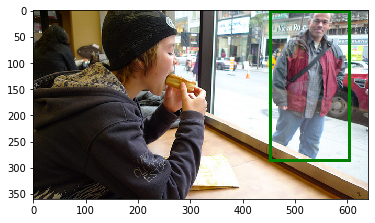

In [22]:
# randomly sample one ref
# ref_ids = refer.getRefIds()
ref_id = ref_ids[1462]#np.random.randint(0, len(ref_ids))]
print(len(ref_ids))
ref = refer.Refs[ref_id]
print ('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='box')
plt.show()

In [26]:
img_id = ref["image_id"]
ann_id = ref["ann_id"]
img_path = os.path.join(refer.IMAGE_DIR, refer.Imgs[img_id]["file_name"])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

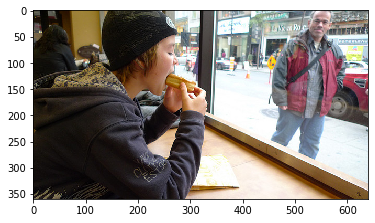

In [27]:
plt.imshow(img)

In [31]:
refer.Imgs[img_id]

{'coco_url': 'http://mscoco.org/images/544568',
 'date_captured': '2013-11-20 16:45:54',
 'file_name': 'COCO_train2014_000000544568.jpg',
 'flickr_url': 'http://farm3.staticflickr.com/2698/4051321547_1ac5ee7b3e_z.jpg',
 'height': 360,
 'id': 544568,
 'license': 3,
 'width': 640}

In [9]:
c = 0
for i in range(5000):
    if 'OOV' in exps[i]:
        c += 1
print(c)
with open('generated_expressions_with_true_target.json') as json_file:
        gen_exps = json.load(json_file)
print(len(gen_exps))

178
5000
